In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.linear_model import SGDClassifier

# Multiprocesado
import multiprocessing

# Red Neuronal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Guardar Modelo
import pickle

# ELIMINAR ACCELERÓMETRO

In [393]:
path = "data_train.csv"

df = pd.read_csv(path)

In [394]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [87]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531,45:34.524141,4
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431,45:34.769324,4
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778,45:35.021519,4
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405,45:35.270292,4
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688,45:35.524654,4


In [88]:
print(df.shape)

(1070, 16)


Obtenemos el número de gestos realizados, `label`

In [89]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [90]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [395]:
X_df = df.drop(["label", "TimeStamp", "AccX", "AccY", "AccZ"], axis=1)
y_df = df["label"]

In [92]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,GyX,GyY,GyZ
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,0.011955,0.013385,0.005531
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,0.028148,0.021393,0.020431
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,0.030210,0.049329,0.045778
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,0.092142,0.044935,0.053405
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,0.040415,0.013281,0.015688


In [93]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [94]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,GyX,GyY,GyZ
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,11094.104942,10900.379584,8006.664676,14589.914388,13224.284909,10269.465524,11859.250788,9447.178542,0.043423,0.015421,0.014608
std,8591.629234,4139.519670,6842.928547,5012.185949,8127.799611,2404.700068,4583.576574,16908.508801,0.101775,0.021124,0.016230
min,29.660622,2516.672068,139.751427,7299.961136,2298.784544,5501.020475,5324.578475,480.783204,0.002094,0.001135,0.001064
25%,3570.698025,8504.933170,851.737638,9202.790424,4393.853989,8714.695931,7095.902675,2671.903565,0.008489,0.004901,0.005267
50%,14316.422122,10057.113338,9282.764071,15825.674110,17143.082252,10352.465636,12309.729042,5680.123859,0.014341,0.007937,0.008703
75%,16927.640872,12282.041061,12490.804234,18106.643498,21132.989954,12477.761688,17372.493219,7208.198876,0.028138,0.017299,0.017210
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,156087.716611,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [95]:
y_df.value_counts()

label
2    154
3    153
5    153
1    153
6    153
4    152
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [96]:
X_df.isnull().any()

CH1    False
CH2    False
CH3    False
CH4    False
CH5    False
CH6    False
CH7    False
CH8    False
GyX    False
GyY    False
GyZ    False
dtype: bool

In [97]:
X_df.isnull().sum()

CH1    0
CH2    0
CH3    0
CH4    0
CH5    0
CH6    0
CH7    0
CH8    0
GyX    0
GyY    0
GyZ    0
dtype: int64

In [98]:
X_df.isnull().sum() / len(X_df) * 100

CH1    0.0
CH2    0.0
CH3    0.0
CH4    0.0
CH5    0.0
CH6    0.0
CH7    0.0
CH8    0.0
GyX    0.0
GyY    0.0
GyZ    0.0
dtype: float64

In [99]:
y_df.isnull().any()

False

In [100]:
y_df.isnull().sum()

0

In [101]:
y_df.isnull().sum() / len(y_df) * 100

0.0

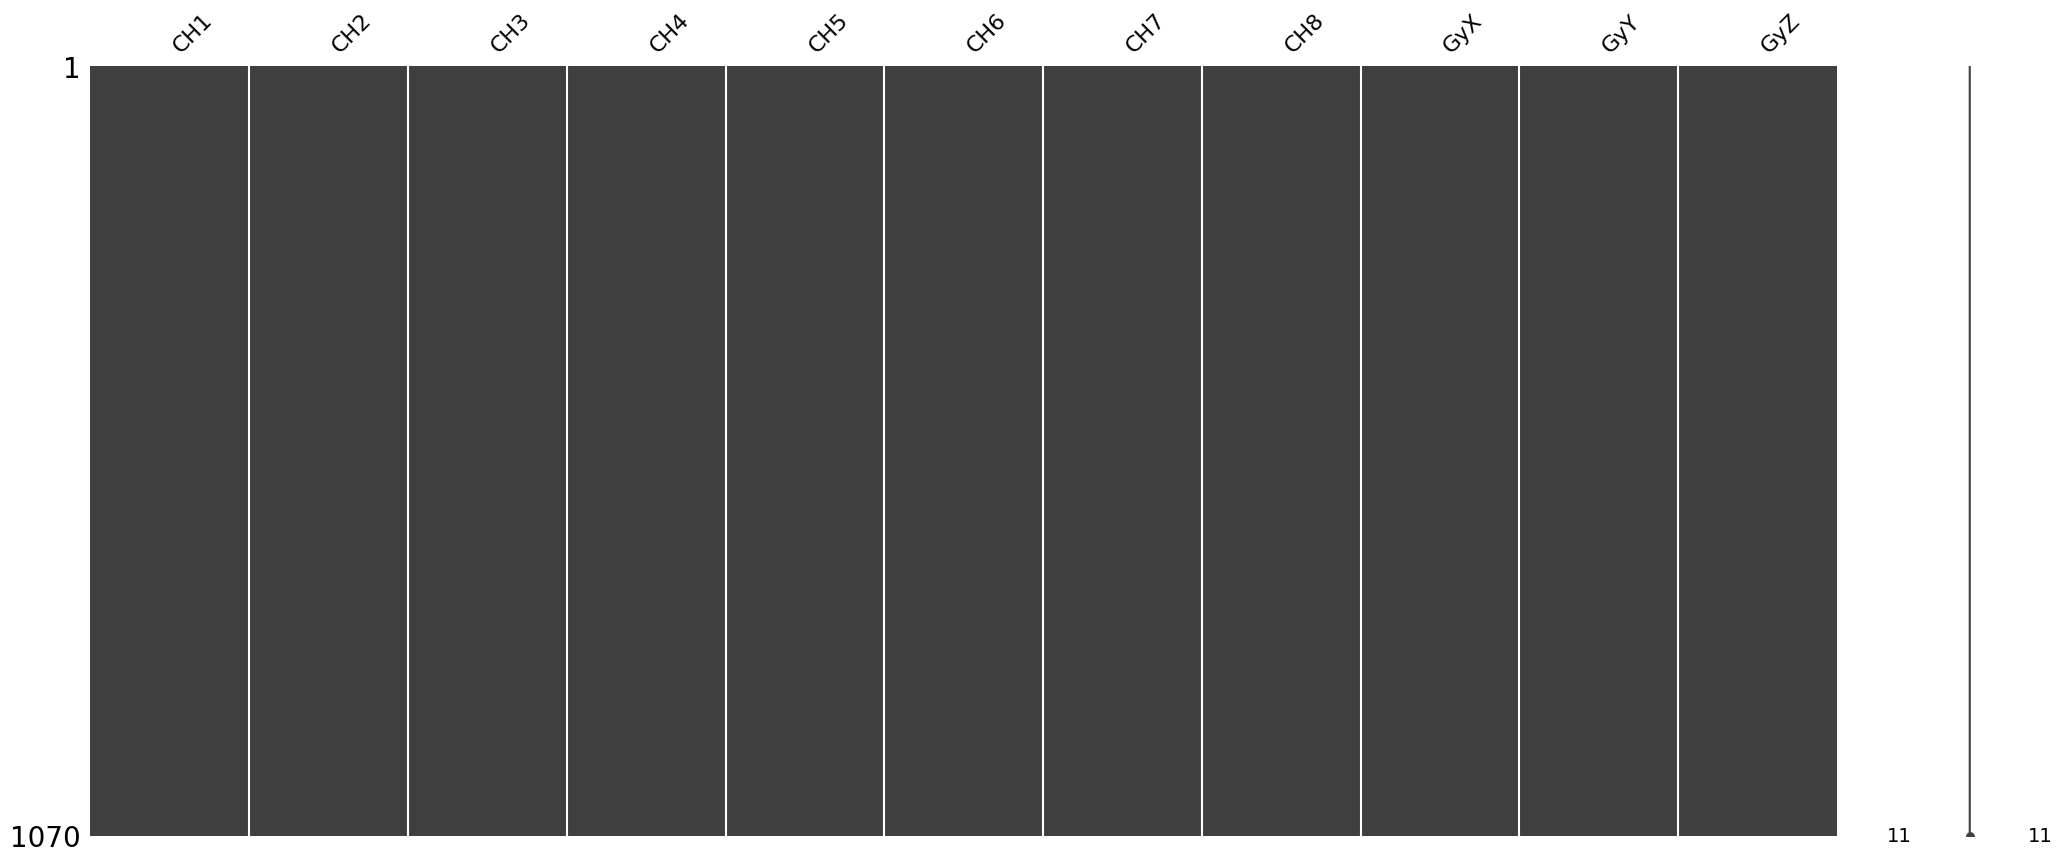

In [102]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

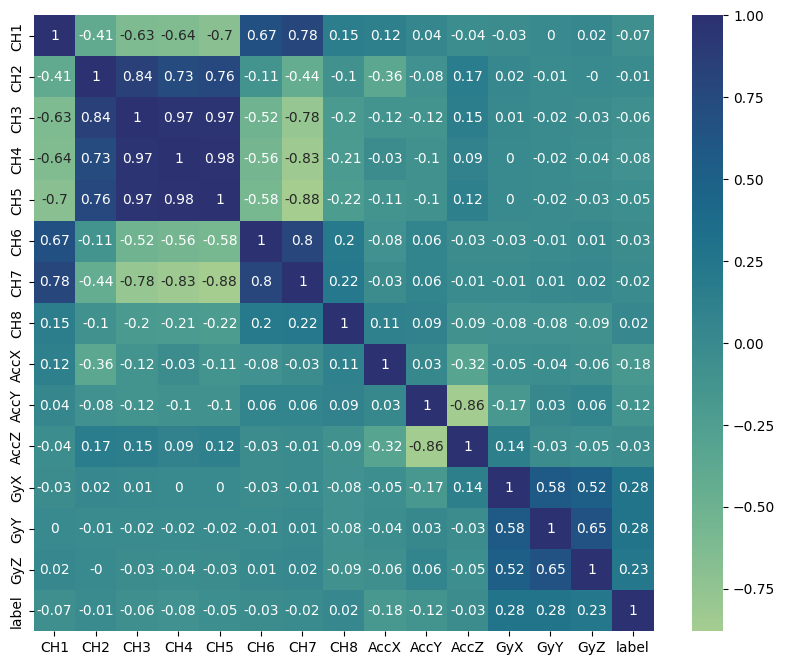

In [103]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [396]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [397]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [398]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [399]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [400]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [109]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [110]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [111]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
18,True,425,0.867975,0.010239
21,True,500,0.866806,0.011630
19,True,450,0.866806,0.011630
17,True,400,0.866806,0.011630
20,True,475,0.865636,0.013083


In [112]:
random_forest_grid.best_score_

0.867975299554247

In [113]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 425}

In [114]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=425, random_state=33))])


In [115]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [116]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       0.91      0.95      0.93        21
           2       0.95      0.81      0.88        26
           3       0.91      0.97      0.94        33
           4       1.00      0.95      0.97        38
           5       0.85      0.97      0.91        35
           6       0.96      0.80      0.87        30

    accuracy                           0.93       214
   macro avg       0.93      0.92      0.92       214
weighted avg       0.93      0.93      0.92       214



In [117]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.9252336448598131


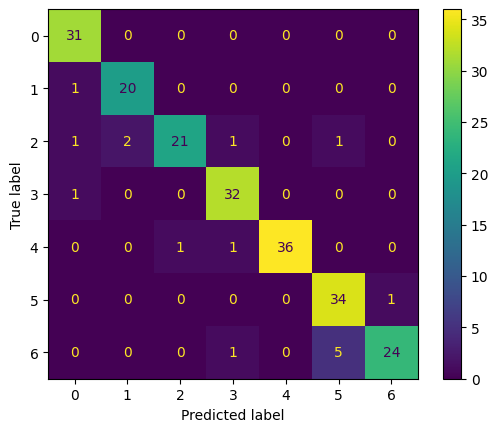

In [118]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [403]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [423]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [425]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
57,150,None,lbfgs,0.397303,0.018387,0.449753,0.006671
9,10,None,lbfgs,0.397303,0.018387,0.449753,0.006671
1,1,None,lbfgs,0.397303,0.018387,0.449753,0.006671
25,50,None,lbfgs,0.397303,0.018387,0.449753,0.006671
41,100,None,lbfgs,0.397303,0.018387,0.449753,0.006671


In [426]:
logistic_grid.best_params_

{'classifier__C': 1,
 'classifier__penalty': None,
 'classifier__solver': 'lbfgs'}

In [427]:
logistic_grid.best_score_

0.3973032288254547

In [124]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', penalty=None,
                                    random_state=33))])


In [420]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [-0.34581813  1.11860629 -0.46947077  0.52709645 -0.64538449  0.18779282
 -0.37282216]
Coeficientes: [('CH1', -1.7603132359119393), ('CH2', -0.777299308715253), ('CH3', 0.992220626954203), ('CH4', 0.8561899595018564), ('CH5', 0.6892225587482836), ('CH6', 0.7748008189260932), ('CH7', 2.7927703390931335), ('CH8', -0.2159516571103472), ('AccX', -5.082261208250693), ('AccY', -0.2609957495093391), ('AccZ', 0.632976826898816), ('GyX', 3.231267508699454), ('GyY', 0.5594858066542633), ('GyZ', -2.0556541393118435), ('TimeStamp', 1.4840817821354337), ('label', 0.468236216087272)]
Accuracy de test: 0.3598130841121495


In [421]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [422]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.40      0.74      0.52        31
           1       0.27      0.33      0.30        21
           2       0.20      0.15      0.17        26
           3       0.17      0.15      0.16        33
           4       0.59      0.42      0.49        38
           5       0.47      0.40      0.43        35
           6       0.33      0.27      0.30        30

    accuracy                           0.36       214
   macro avg       0.35      0.35      0.34       214
weighted avg       0.36      0.36      0.35       214



In [128]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.3598130841121495


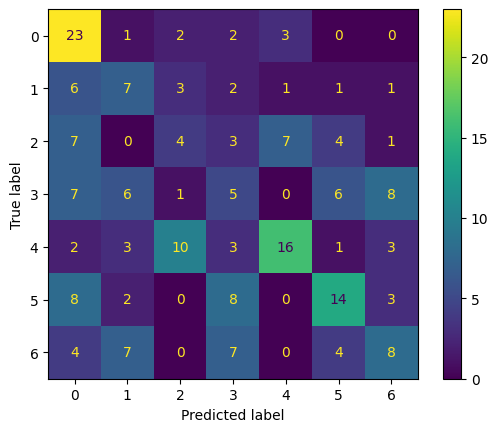

In [129]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [130]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [131]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [132]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
270,0,0.5,10,5,0.91379,0.008326,1.0,0.0
240,0,0.5,None,5,0.91379,0.008326,1.0,0.0
264,0,0.5,7,5,0.91379,0.008326,1.0,0.0
258,0,0.5,5,5,0.91379,0.008326,1.0,0.0
276,0,0.5,25,5,0.91379,0.008326,1.0,0.0


In [133]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': None,
 'classifier__max_leaf_nodes': 5}

In [134]:
hist_gradient_grid.best_score_

0.9137899181017115

In [135]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.5,
                                                max_iter=1000, max_leaf_nodes=5,
                                                n_iter_no_change=5,
                                                random_state=33, tol=0.0001))])


In [136]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [137]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.98        21
           2       0.96      0.88      0.92        26
           3       0.89      1.00      0.94        33
           4       0.95      0.92      0.93        38
           5       0.94      0.97      0.96        35
           6       0.96      0.87      0.91        30

    accuracy                           0.95       214
   macro avg       0.95      0.95      0.95       214
weighted avg       0.95      0.95      0.95       214



In [138]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.9485981308411215


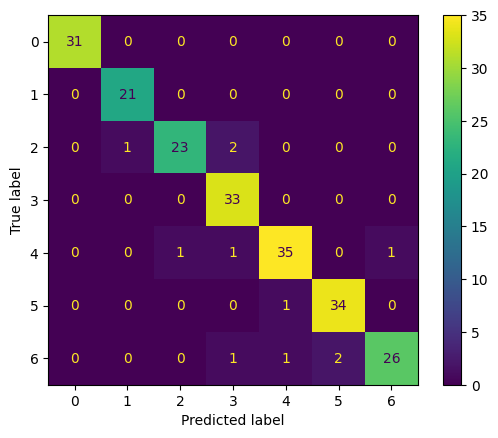

In [139]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [430]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [436]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_byle...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [437]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
1721,0.9,7,401,1,0.898200,0.007193
1031,0.5,5,401,1,0.895923,0.012294
1727,0.9,7,226,1,0.893604,0.008758
1037,0.5,5,226,1,0.892427,0.010066
688,0.3,3,156,0.9,0.892394,0.015799


In [438]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.9,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 401,
 'classifier__subsample': 1}

In [439]:
XGBoost_grid.best_score_

0.8981998064589684

In [440]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.9,
               

In [441]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [442]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       0.95      0.95      0.95        21
           2       0.88      0.88      0.88        26
           3       0.89      1.00      0.94        33
           4       1.00      0.79      0.88        38
           5       0.87      0.97      0.92        35
           6       0.93      0.83      0.88        30

    accuracy                           0.92       214
   macro avg       0.92      0.92      0.92       214
weighted avg       0.92      0.92      0.91       214



In [443]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9158878504672897


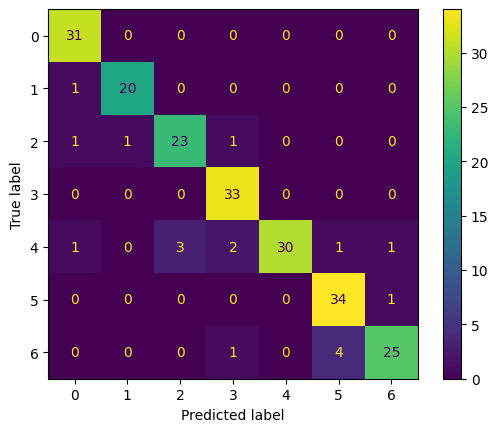

In [444]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [446]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [447]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
735 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
735 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 11
[LightGBM] [Info] Start training from score -1.956480
[LightGBM] [Info] Start training from score -1.869468
[LightGBM] [Info] Start training from score -1.900240
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -2.016072
[LightGBM] [Info] Start training from score -1.981586
[LightGBM] [Info] Start training from score -1.940086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500, n_jobs=19,
                   param_dist...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 75,
                                                                  100, 125, 150,
                                                                  175, 200],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000212F11B1ED0>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [448]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
497,gbdt,True,0.5,200,325,25,0.3,0.920474,0.005614,1.0,0.0
314,gbdt,True,0.5,150,304,25,0.5,0.920474,0.005614,1.0,0.0
105,gbdt,True,0.5,150,474,25,0.1,0.920474,0.005614,1.0,0.0
8,gbdt,True,0.5,100,213,25,0.3,0.916747,0.005157,1.0,0.0
45,gbdt,True,0.5,25,177,25,0.1,0.916747,0.005157,1.0,0.0


In [449]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 150,
 'classifier__n_estimators': 474,
 'classifier__num_leaves': 25,
 'classifier__subsample': 0.1}

In [154]:
light_grid.best_score_

0.9204738720442686

In [155]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.5,
                                max_depth=100, n_estimators=474, num_leaves=25,
                                random_state=33, subsample=0.5))])


In [156]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [157]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.95      0.95      0.95        21
           2       0.88      0.85      0.86        26
           3       0.94      1.00      0.97        33
           4       0.92      0.87      0.89        38
           5       0.97      0.97      0.97        35
           6       0.93      0.90      0.92        30

    accuracy                           0.93       214
   macro avg       0.93      0.93      0.93       214
weighted avg       0.93      0.93      0.93       214



In [158]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.9345794392523364


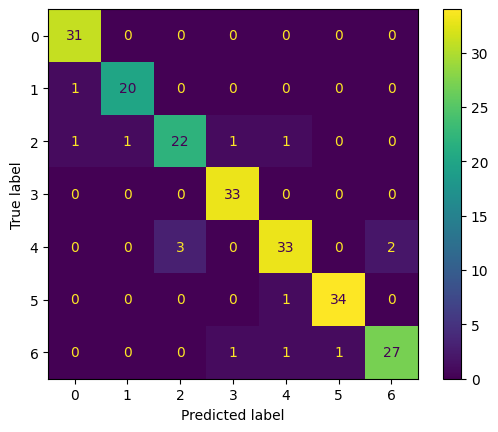

In [159]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [452]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [456]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200, 225, 250, 275, 300, 325,
                                           350, 375, 400],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [459]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
227,325,auto,rbf,0.575651,0.027951
211,300,auto,rbf,0.573355,0.028043
195,275,auto,rbf,0.573192,0.027491
243,350,auto,rbf,0.573077,0.032492
185,250,0.1,rbf,0.572076,0.025824


In [460]:
svm_grid.best_params_

{'classifier__C': 325,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'rbf'}

In [462]:
svm_grid.best_score_

0.575650932223056

In [463]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=325, gamma='auto'))])


In [464]:
modelo_final_svm = svm_grid.best_estimator_

In [465]:
y_test_pred = modelo_final_svm.predict(x_test)

In [466]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        31
           1       0.60      0.71      0.65        21
           2       0.54      0.50      0.52        26
           3       0.56      0.58      0.57        33
           4       0.73      0.58      0.65        38
           5       0.71      0.57      0.63        35
           6       0.45      0.47      0.46        30

    accuracy                           0.62       214
   macro avg       0.62      0.62      0.61       214
weighted avg       0.62      0.62      0.62       214



In [467]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.6214953271028038


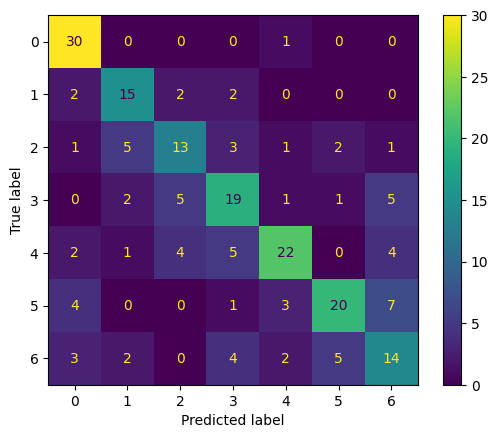

In [468]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [469]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [477]:
sgd_params = {
    'classifier__alpha': [0.5, 0.3, 0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'classifier__eta0': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.5, 0.3, 0.1, 0.01, 0.001,
                                               0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7,
                                              0.9, 1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [478]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
1263,0.3,1,adaptive,hinge,None,0.404387,0.018074
1103,0.3,0.7,adaptive,hinge,None,0.404074,0.012429
1743,0.1,0.7,adaptive,hinge,None,0.402076,0.011594
4382,0.00001,0.9,adaptive,hinge,elasticnet,0.399068,0.008210
3661,0.0001,0.7,adaptive,hinge,l2,0.398643,0.008705


In [479]:
sgd_grid.best_params_

{'classifier__alpha': 0.3,
 'classifier__eta0': 1,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'hinge',
 'classifier__penalty': None}

In [480]:
sgd_grid.best_score_

0.40438701659642545

In [481]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'GyX', 'GyY',
       'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.3, eta0=1, learning_rate='adaptive',
                               penalty=None))])


In [482]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [483]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.45      0.68      0.54        31
           1       0.30      0.57      0.39        21
           2       0.07      0.04      0.05        26
           3       0.17      0.12      0.14        33
           4       0.63      0.45      0.52        38
           5       0.39      0.37      0.38        35
           6       0.34      0.33      0.34        30

    accuracy                           0.36       214
   macro avg       0.34      0.37      0.34       214
weighted avg       0.35      0.36      0.35       214



In [484]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.3644859813084112


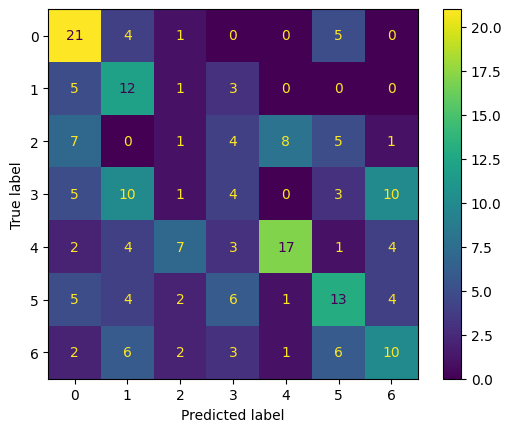

In [485]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

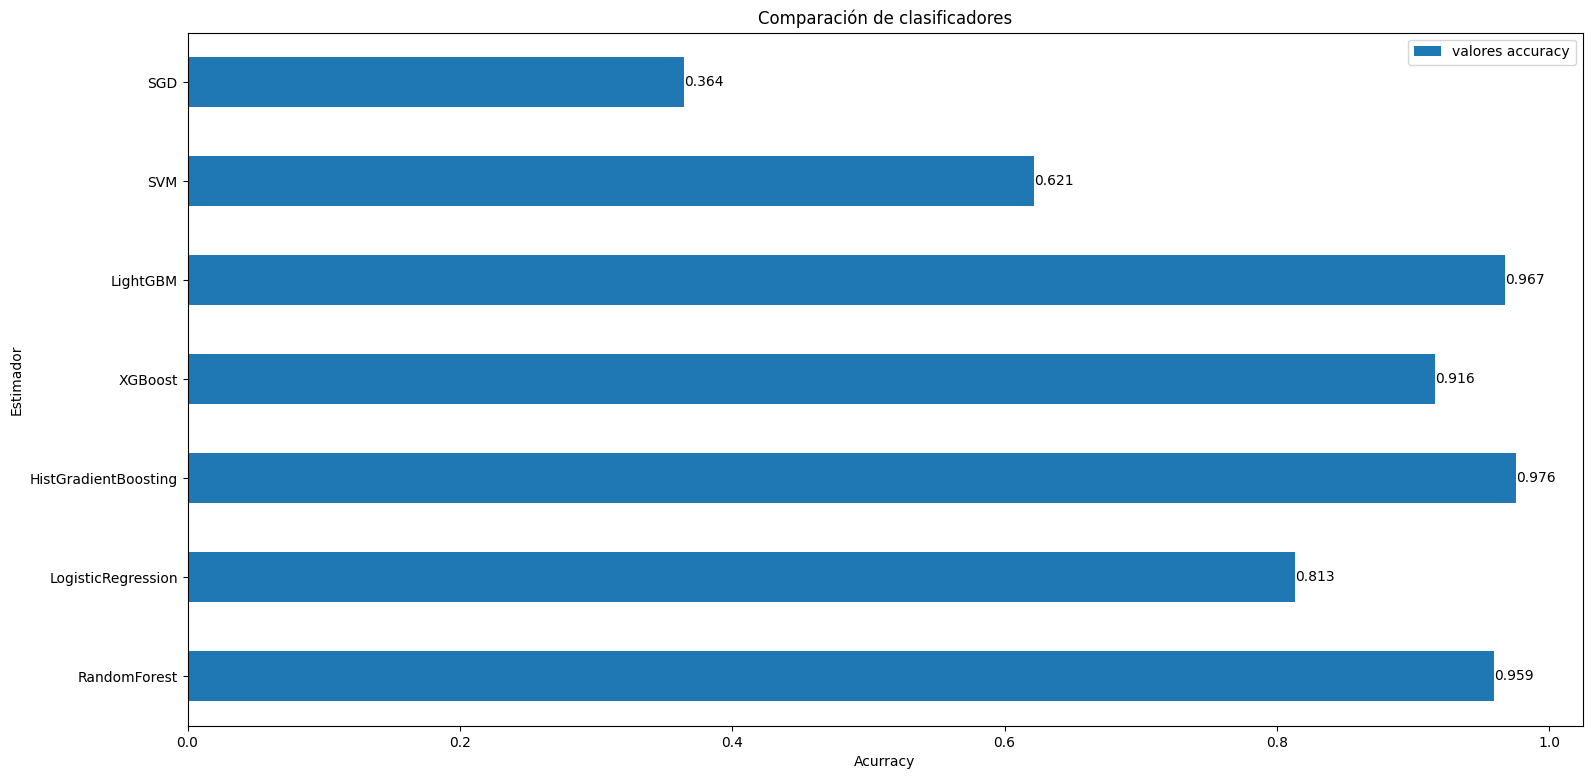

In [489]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [182]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [488]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.3,
        eta0 = 1,
        learning_rate = 'adaptive',
        loss = 'hinge',
        penalty = None   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_SGD.pkl', 'wb'))

In [401]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 425
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_RF.pkl', 'wb'))

In [461]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 325,
        gamma = 'auto',
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_SVM.pkl', 'wb'))

In [402]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 1,
        penalty = None,
        solver = 'lbfgs',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [428]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.5,
        max_depth = None,
        max_leaf_nodes = 5        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_HIST.pkl', 'wb'))

In [445]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.9,
        max_depth = 7,
        n_estimators = 401,
        subsample = 1        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_XGB.pkl', 'wb'))

In [450]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.5,
        max_depth = 150,
        n_estimators = 474,
        num_leaves = 25,
        subsample = 0.1      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO AC/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 11
[LightGBM] [Info] Start training from score -1.956480
[LightGBM] [Info] Start training from score -1.869468
[LightGBM] [Info] Start training from score -1.900240
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -2.016072
[LightGBM] [Info] Start training from score -1.981586
[LightGBM] [Info] Start training from score -1.940086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

# ELIMINAR IMU

In [490]:
path = "data_train.csv"

df = pd.read_csv(path)

In [491]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [192]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531,45:34.524141,4
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431,45:34.769324,4
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778,45:35.021519,4
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405,45:35.270292,4
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688,45:35.524654,4


In [193]:
print(df.shape)

(1070, 16)


Obtenemos el número de gestos realizados, `label`

In [194]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [195]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [492]:
X_df = df.drop(["label", "TimeStamp", "AccX", "AccY", "AccZ", "GyX", "GyY", "GyZ"], axis=1)
y_df = df["label"]

In [197]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100


In [198]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [199]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,11094.104942,10900.379584,8006.664676,14589.914388,13224.284909,10269.465524,11859.250788,9447.178542
std,8591.629234,4139.519670,6842.928547,5012.185949,8127.799611,2404.700068,4583.576574,16908.508801
min,29.660622,2516.672068,139.751427,7299.961136,2298.784544,5501.020475,5324.578475,480.783204
25%,3570.698025,8504.933170,851.737638,9202.790424,4393.853989,8714.695931,7095.902675,2671.903565
50%,14316.422122,10057.113338,9282.764071,15825.674110,17143.082252,10352.465636,12309.729042,5680.123859
75%,16927.640872,12282.041061,12490.804234,18106.643498,21132.989954,12477.761688,17372.493219,7208.198876
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,156087.716611


Observamos si las salidas estan balanceadas

In [200]:
y_df.value_counts()

label
2    154
3    153
5    153
1    153
6    153
4    152
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [201]:
X_df.isnull().any()

CH1    False
CH2    False
CH3    False
CH4    False
CH5    False
CH6    False
CH7    False
CH8    False
dtype: bool

In [202]:
X_df.isnull().sum()

CH1    0
CH2    0
CH3    0
CH4    0
CH5    0
CH6    0
CH7    0
CH8    0
dtype: int64

In [203]:
X_df.isnull().sum() / len(X_df) * 100

CH1    0.0
CH2    0.0
CH3    0.0
CH4    0.0
CH5    0.0
CH6    0.0
CH7    0.0
CH8    0.0
dtype: float64

In [204]:
y_df.isnull().any()

False

In [205]:
y_df.isnull().sum()

0

In [206]:
y_df.isnull().sum() / len(y_df) * 100

0.0

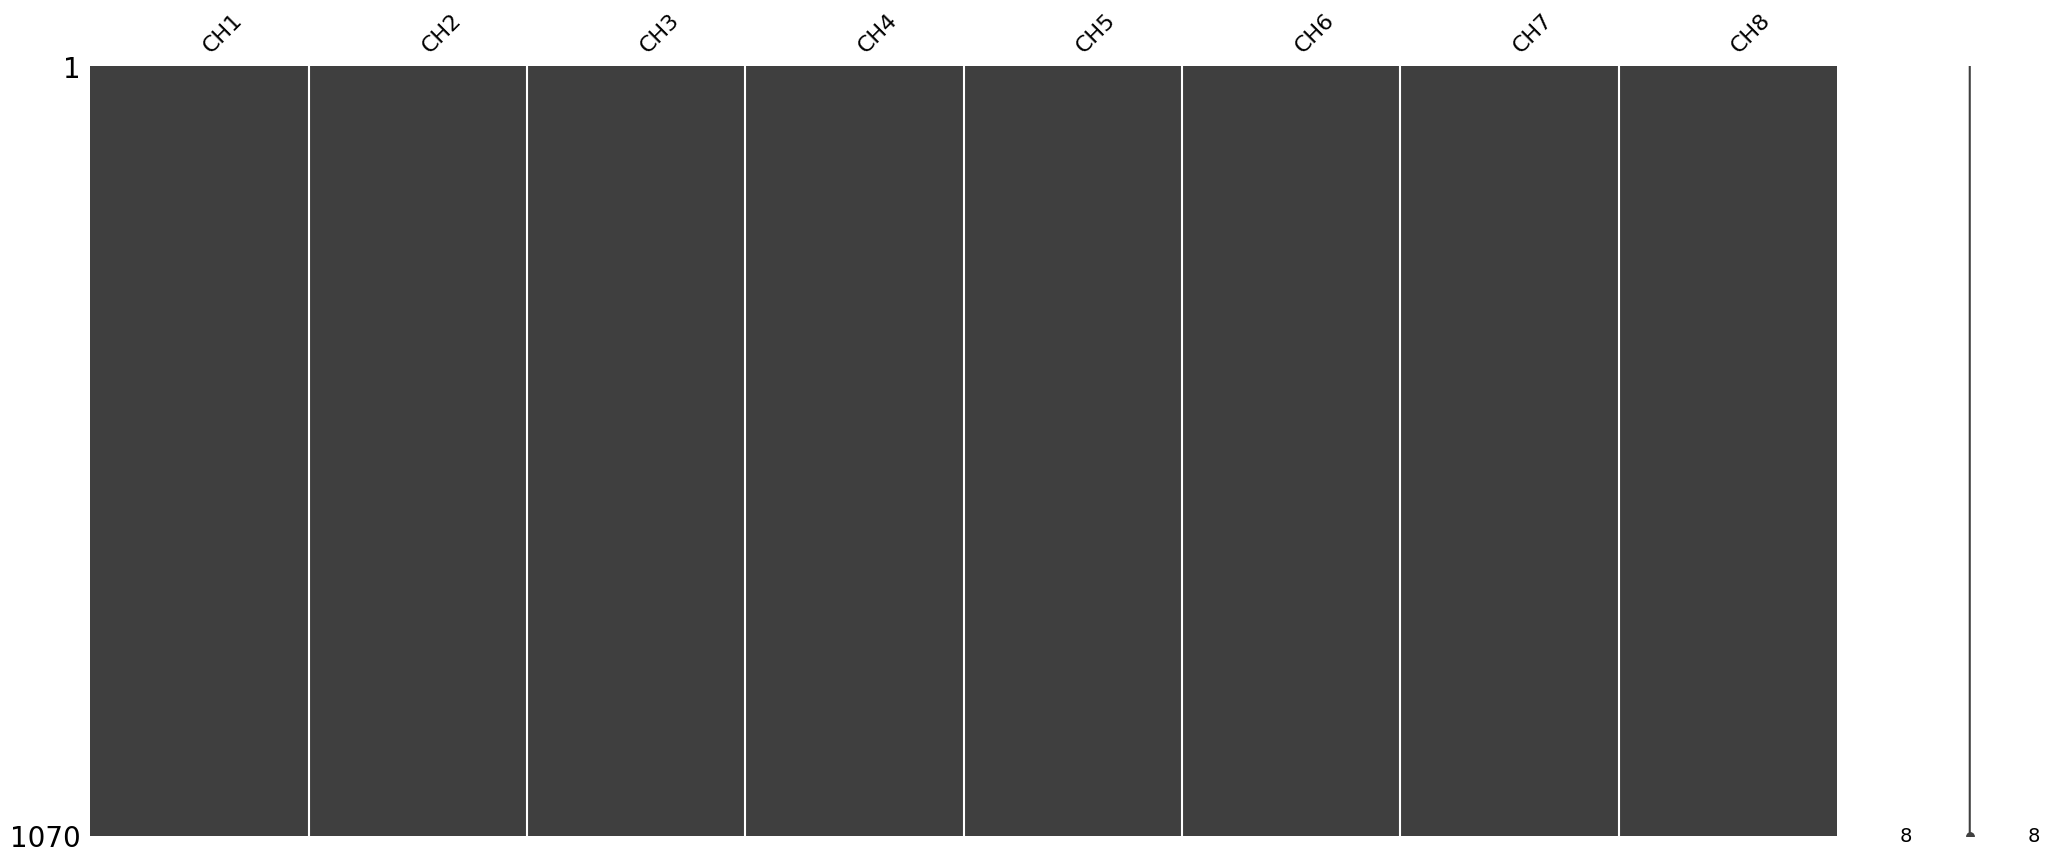

In [207]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

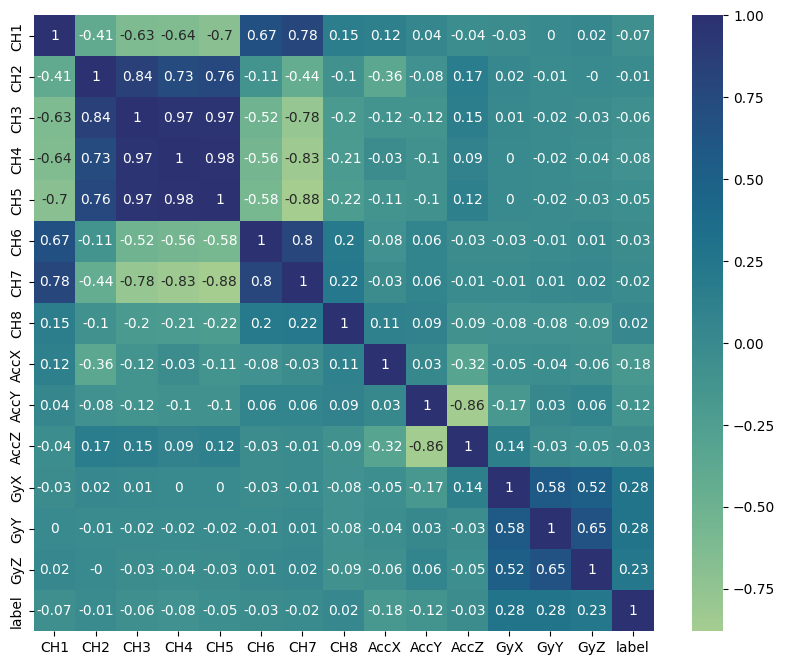

In [208]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [493]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [494]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [495]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [496]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [497]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])

## RANDOM FOREST

In [214]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [215]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [216]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
5,True,100,0.919384,0.012537
15,True,350,0.919376,0.013212
9,True,200,0.919376,0.013212
13,True,300,0.919372,0.014415
16,True,375,0.918210,0.012008


In [217]:
random_forest_grid.best_score_

0.9193841246472826

In [218]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 100}

In [219]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=33))])


In [220]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [221]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.98        21
           2       0.89      0.92      0.91        26
           3       0.97      1.00      0.99        33
           4       1.00      0.84      0.91        38
           5       0.92      1.00      0.96        35
           6       0.93      0.93      0.93        30

    accuracy                           0.95       214
   macro avg       0.95      0.96      0.95       214
weighted avg       0.96      0.95      0.95       214



In [222]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.9532710280373832


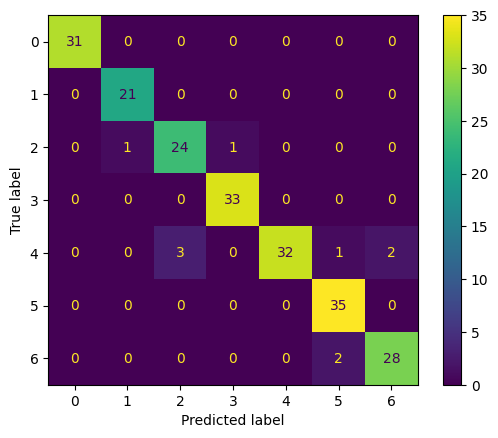

In [223]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [500]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [504]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200, 225, 250],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [505]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
77,200,l2,lbfgs,0.288809,0.027577,0.319433,0.022012
93,250,l2,lbfgs,0.287810,0.026171,0.323617,0.024753
69,175,l2,lbfgs,0.281835,0.025169,0.319108,0.018269
12,10,l2,newton-cg,0.278133,0.013731,0.311932,0.018781
37,75,l2,lbfgs,0.273614,0.017311,0.321733,0.019859


In [506]:
logistic_grid.best_params_

{'classifier__C': 200,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [228]:
logistic_grid.best_score_

0.2888094860732069

In [229]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=200, class_weight='balanced',
                                    random_state=33))])


In [230]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.62580768  1.08939086 -1.00495075  0.28059812 -0.80731665  0.19363411
 -0.37716337]
Coeficientes: [('CH1', -2.4436603918018767), ('CH2', -1.8098356952975625), ('CH3', 5.1016581906831835), ('CH4', -1.9564190180595626), ('CH5', 1.258263061551533), ('CH6', 1.3040018670355282), ('CH7', 3.743107998993639), ('CH8', 0.12707554076069916), ('AccX', 3.9335157558734064), ('AccY', 1.045932516068604), ('AccZ', -5.063559152171438), ('GyX', 2.8847625136147226), ('GyY', 1.8273903873662196), ('GyZ', -1.0651969568548914), ('TimeStamp', -1.445668800935187), ('label', -0.7143670267389892)]
Accuracy de test: 0.24299065420560748


In [231]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [232]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.28      0.29      0.29        31
           1       0.13      0.19      0.16        21
           2       0.19      0.19      0.19        26
           3       0.06      0.03      0.04        33
           4       0.57      0.42      0.48        38
           5       0.17      0.06      0.09        35
           6       0.22      0.50      0.30        30

    accuracy                           0.24       214
   macro avg       0.23      0.24      0.22       214
weighted avg       0.25      0.24      0.23       214



In [233]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.24299065420560748


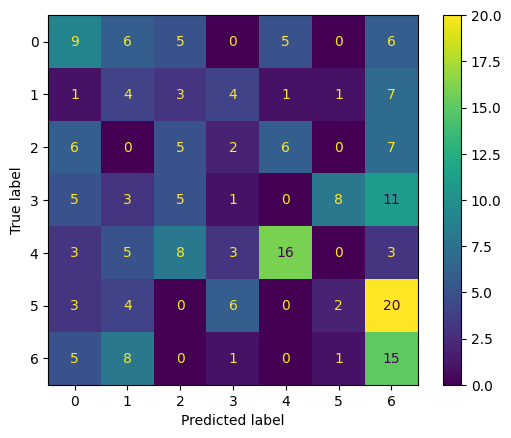

In [234]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [235]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [236]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [237]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
106,0,0.01,50,75,0.923863,0.00757,1.0,0.0
111,0,0.01,75,50,0.923863,0.00757,1.0,0.0
63,0,0.01,None,50,0.923863,0.00757,1.0,0.0
64,0,0.01,None,75,0.923863,0.00757,1.0,0.0
98,0,0.01,25,25,0.923863,0.00757,1.0,0.0


In [238]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': None,
 'classifier__max_leaf_nodes': 25}

In [239]:
hist_gradient_grid.best_score_

0.9238633603592726

In [240]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.01,
                                                max_iter=1000,
                                                max_leaf_nodes=25,
                                                n_iter_no_change=5,
                                                random_state=33, tol=0.0001))])


In [241]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [242]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.88      1.00      0.93        21
           2       0.88      0.85      0.86        26
           3       0.97      1.00      0.99        33
           4       0.97      0.92      0.95        38
           5       1.00      1.00      1.00        35
           6       1.00      0.97      0.98        30

    accuracy                           0.96       214
   macro avg       0.96      0.96      0.96       214
weighted avg       0.96      0.96      0.96       214



In [243]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.9626168224299065


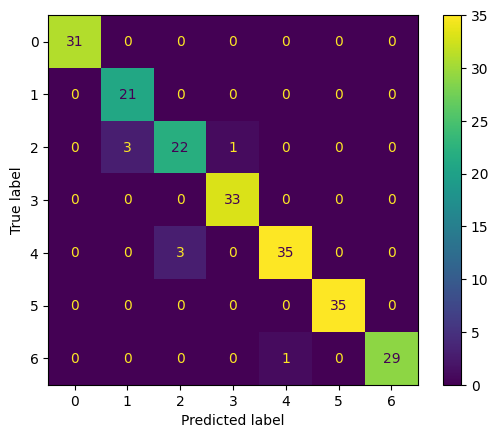

In [244]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [245]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [246]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [247]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
1035,0.5,5,226,0.7,0.912177,0.010270
1715,0.9,7,30,1,0.911275,0.005808
669,0.3,3,401,0.7,0.911139,0.005832
1047,0.5,5,156,0.7,0.911095,0.006540
791,0.3,11,401,1,0.911084,0.004092


In [248]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 226,
 'classifier__subsample': 0.7}

In [249]:
XGBoost_grid.best_score_

0.9121767537522253

In [250]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytre...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,

In [251]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [252]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.98        21
           2       0.92      0.92      0.92        26
           3       0.97      1.00      0.99        33
           4       0.97      0.89      0.93        38
           5       0.95      1.00      0.97        35
           6       0.97      0.93      0.95        30

    accuracy                           0.96       214
   macro avg       0.96      0.96      0.96       214
weighted avg       0.96      0.96      0.96       214



In [253]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9626168224299065


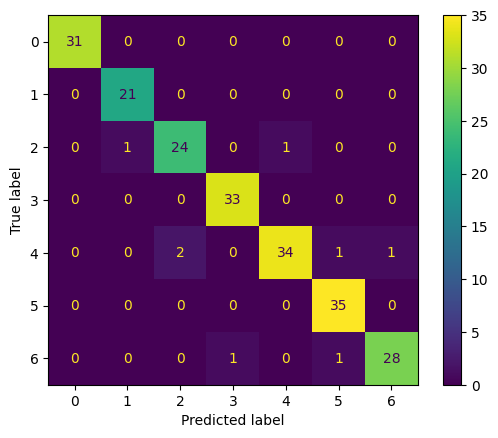

In [254]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [255]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [256]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 8
[LightGBM] [Info] Start training from score -1.956480
[LightGBM] [Info] Start training from score -1.869468
[LightGBM] [Info] Start training from score -1.900240
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -2.016072
[LightGBM] [Info] Start training from score -1.981586
[LightGBM] [Info] Start training from score -1.940086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500, n_jobs=19,
                   param_distributions={'classi...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002128200B510>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [257]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
244,gbdt,True,0.5,10,117,100,0.1,0.915429,0.013079,1.0,0.0
497,gbdt,True,0.5,10,293,100,0.9,0.915429,0.015939,1.0,0.0
475,gbdt,True,0.1,100,200,25,0.7,0.914621,0.015616,1.0,0.0
397,gbdt,True,0.7,5,344,25,0.3,0.914588,0.010323,1.0,0.0
290,gbdt,True,0.7,5,294,100,0.3,0.914588,0.010323,1.0,0.0


In [258]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 117,
 'classifier__num_leaves': 100,
 'classifier__subsample': 0.1}

In [259]:
light_grid.best_score_

0.9154292947648642

In [260]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.5,
                                max_depth=10, n_estimators=117, num_leaves=100,
                                random_state=33, subsample=0.1))])


In [261]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [262]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.91      1.00      0.95        21
           2       0.92      0.92      0.92        26
           3       1.00      1.00      1.00        33
           4       0.95      0.92      0.93        38
           5       1.00      1.00      1.00        35
           6       0.97      0.97      0.97        30

    accuracy                           0.97       214
   macro avg       0.96      0.97      0.97       214
weighted avg       0.97      0.97      0.97       214



In [263]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.9672897196261683


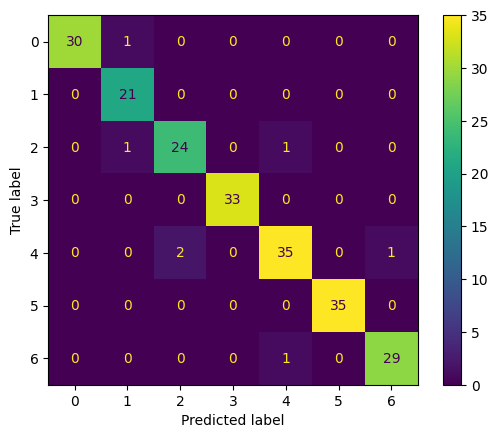

In [264]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [265]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [266]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [267]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
125,150,5,rbf,0.872218,0.011241
157,200,5,rbf,0.872189,0.011237
141,175,5,rbf,0.872189,0.011237
77,75,5,rbf,0.871119,0.010320
93,100,5,rbf,0.871055,0.007246


In [268]:
svm_grid.best_params_

{'classifier__C': 150, 'classifier__gamma': 5, 'classifier__kernel': 'rbf'}

In [269]:
svm_grid.best_score_

0.8722179265000797

In [270]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier', SVC(C=150, gamma=5))])


In [271]:
modelo_final_svm = svm_grid.best_estimator_

In [272]:
y_test_pred = modelo_final_svm.predict(x_test)

In [273]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.95      0.95        21
           2       0.65      0.85      0.73        26
           3       0.91      0.97      0.94        33
           4       0.93      0.66      0.77        38
           5       0.89      0.97      0.93        35
           6       0.93      0.87      0.90        30

    accuracy                           0.89       214
   macro avg       0.89      0.89      0.89       214
weighted avg       0.90      0.89      0.89       214



In [274]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.8878504672897196


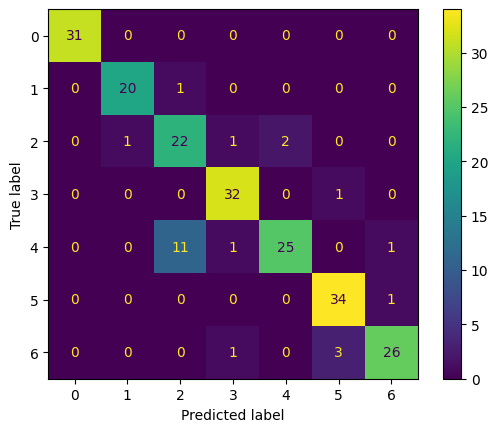

In [275]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [276]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [277]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [278]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
61,0.1,0.001,adaptive,hinge,l2,0.289136,0.033798
463,0.01,0.1,adaptive,hinge,None,0.287635,0.032272
203,0.1,0.1,invscaling,hinge,None,0.284955,0.027931
700,0.001,0.1,adaptive,hinge,l1,0.284205,0.025951
637,0.001,0.01,adaptive,perceptron,l2,0.283300,0.017007


In [279]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.001,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'hinge',
 'classifier__penalty': 'l2'}

In [280]:
sgd_grid.best_score_

0.28913594910944357

In [281]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8'], dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.001,
                               learning_rate='adaptive'))])


In [282]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [283]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45        31
           1       0.12      0.24      0.16        21
           2       0.27      0.15      0.20        26
           3       0.13      0.06      0.08        33
           4       0.51      0.63      0.56        38
           5       0.17      0.14      0.15        35
           6       0.31      0.30      0.31        30

    accuracy                           0.30       214
   macro avg       0.28      0.29      0.27       214
weighted avg       0.29      0.30      0.29       214



In [284]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.29906542056074764


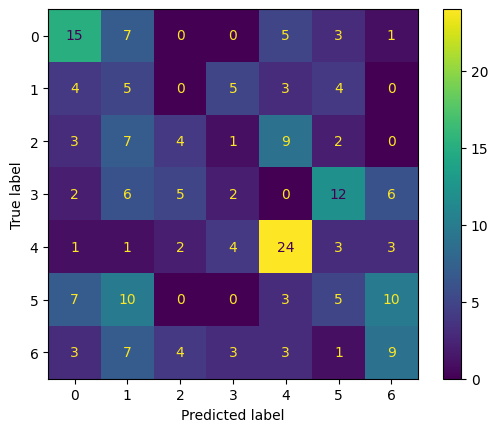

In [285]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

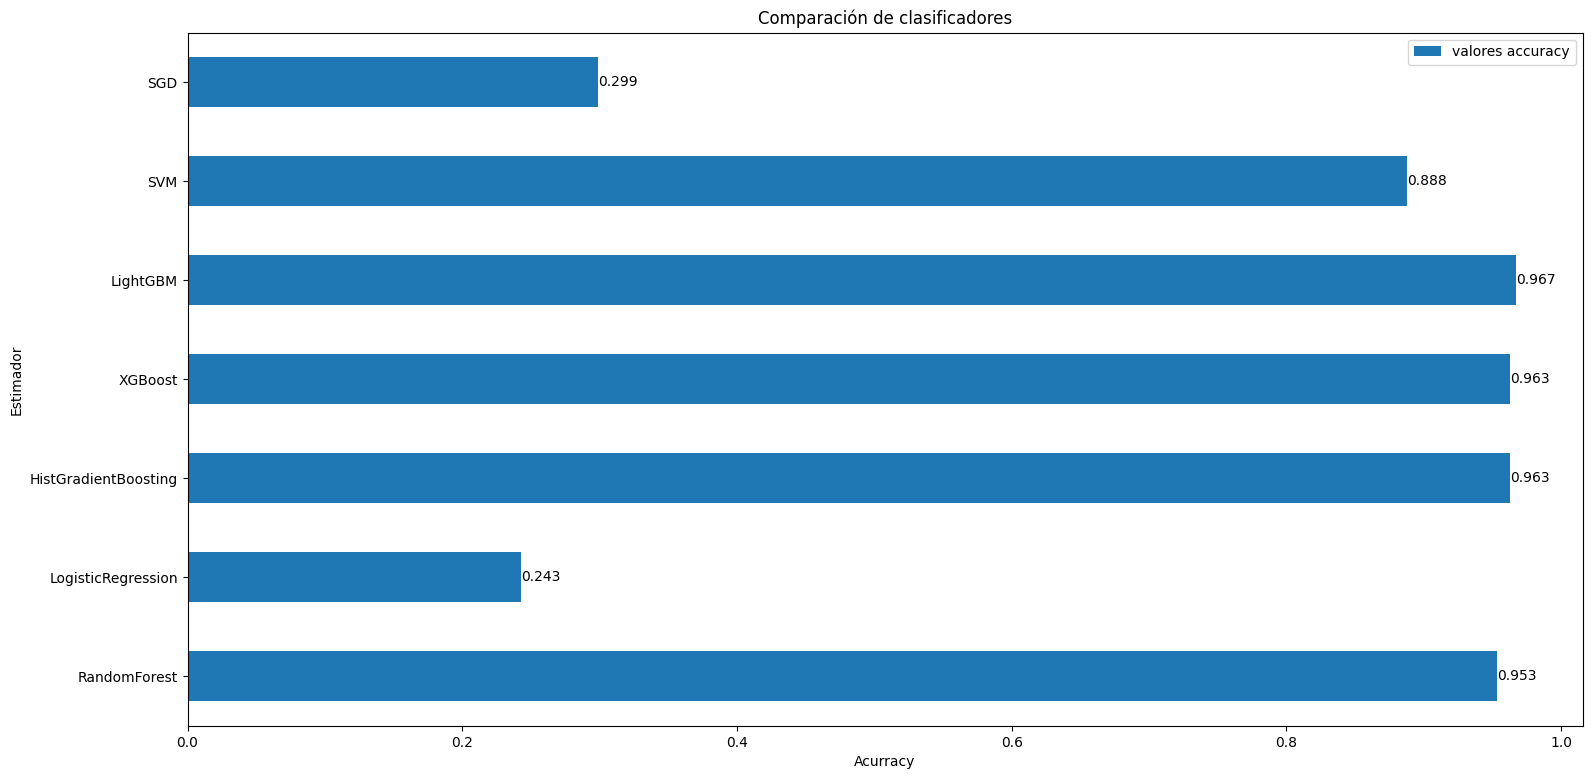

In [286]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [287]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [512]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.001,
        learning_rate = 'adaptive',
        loss = 'hinge',
        penalty = 'l2'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_sgd.pkl', 'wb'))

In [498]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 100
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_RF.pkl', 'wb'))

In [511]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 150,
        gamma = 5,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_SVM.pkl', 'wb'))

In [507]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 200,
        penalty = 'l2',
        solver = 'lbfgs',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [508]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.01,
        max_depth = None,
        max_leaf_nodes = 25         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_HIST.pkl', 'wb'))

In [509]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.5,
        max_depth = 5,
        n_estimators = 226,
        subsample = 0.7        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_XGB.pkl', 'wb'))

In [510]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.5,
        max_depth = 10,
        n_estimators = 117,
        num_leaves = 100,
        subsample = 0.1      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/NO IMU/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 8
[LightGBM] [Info] Start training from score -1.956480
[LightGBM] [Info] Start training from score -1.869468
[LightGBM] [Info] Start training from score -1.900240
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -2.016072
[LightGBM] [Info] Start training from score -1.981586
[LightGBM] [Info] Start training from score -1.940086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

# 4 GESTOS PALMA

In [3]:
path = "data_train_4G_palma.csv"

df = pd.read_csv(path)

In [4]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [5]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876,43:54.481843,0
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185,43:54.730036,0
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477,43:54.984387,0
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060,43:55.230151,0
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270,43:55.485744,0


In [6]:
print(df.shape)

(612, 16)


Obtenemos el número de gestos realizados, `label`

In [7]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 4



0. Reposo
1. Palma
2. Pronación
3. Extensión


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [8]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [9]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [10]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270


In [11]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [12]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,10546.179944,10897.227966,7987.791767,14574.612017,13228.205707,10300.654809,11876.885599,8022.633707,63.508151,156.963646,167.226119,0.057414,0.015990,0.014195
std,6637.466654,4193.686431,6878.900246,5042.186886,8140.140790,2402.142762,4579.511758,14628.743484,29.481888,53.224726,43.829484,0.131585,0.025566,0.017875
min,29.660622,2516.672068,139.751427,7918.421199,2937.473776,5706.341263,5911.057499,480.783204,2.468458,8.325124,2.190726,0.002094,0.001135,0.001064
25%,4074.389190,8531.087660,848.638162,9188.773749,4361.235704,8694.555987,7132.280282,2631.840157,44.844348,154.467977,141.777852,0.007231,0.004541,0.004527
50%,12177.625489,10044.387099,9220.076885,15815.043759,17139.270721,10450.932095,11742.921959,5626.320303,57.902056,169.026902,166.073664,0.013034,0.007038,0.007622
75%,16898.012580,12302.607305,12489.794853,18132.584826,21325.530683,12476.919571,17380.179702,7068.795005,76.926667,185.202685,189.147608,0.025772,0.014939,0.014787
max,19705.620923,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17969.773059,135185.758864,143.986890,243.803526,252.074446,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [13]:
y_df.value_counts()

label
3    155
1    154
2    153
0    150
Name: count, dtype: int64

Observamos si hay valores nulos

In [14]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [15]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [16]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [17]:
y_df.isnull().any()

False

In [18]:
y_df.isnull().sum()

0

In [19]:
y_df.isnull().sum() / len(y_df) * 100

0.0

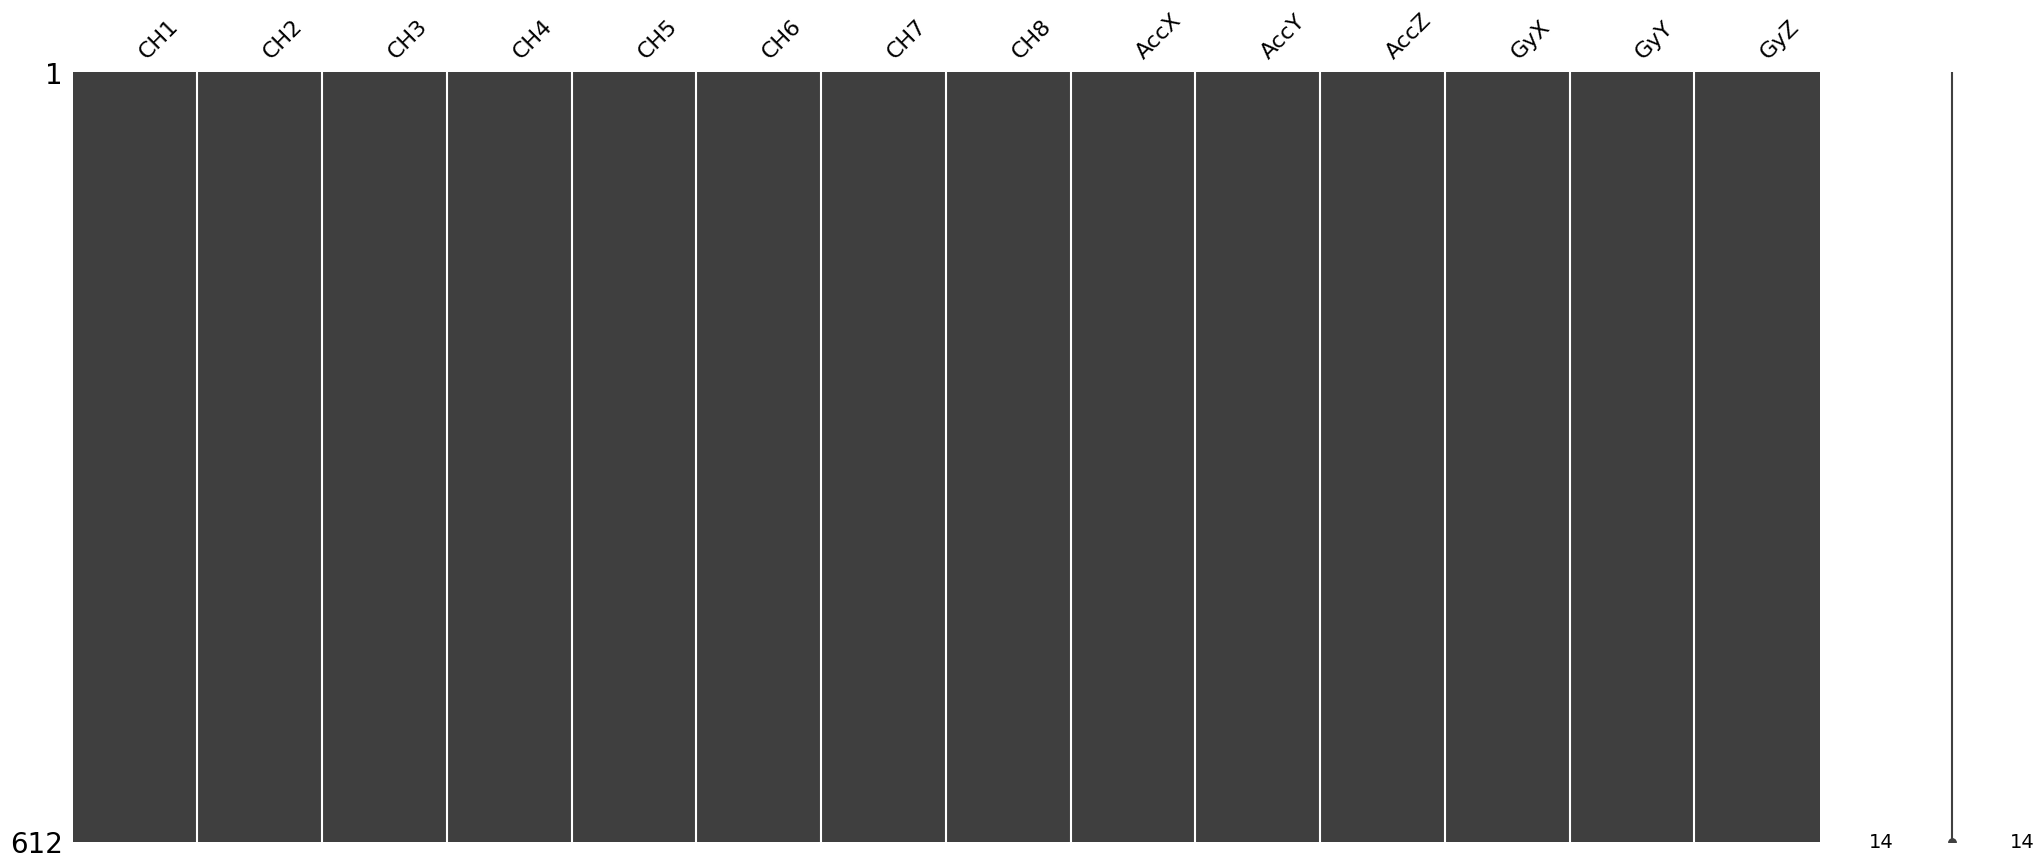

In [20]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

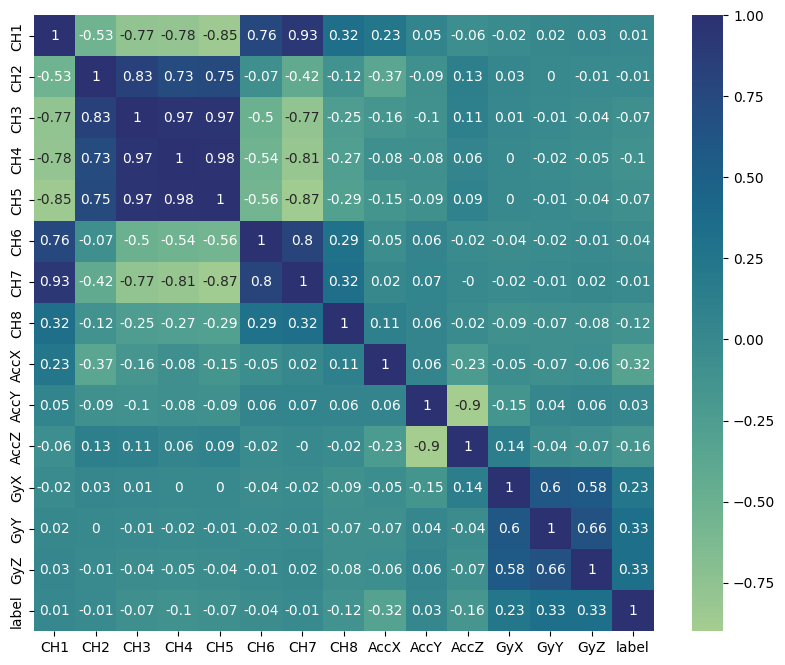

In [21]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [23]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [24]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [26]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [27]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [28]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [29]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
6,True,125,0.930470,0.007652
22,True,550,0.928425,0.007652
7,True,150,0.928425,0.005784
12,True,275,0.926380,0.000000
20,True,475,0.926380,0.005009


In [30]:
random_forest_grid.best_score_

0.9304703476482618

In [31]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 125}

In [32]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=125, random_state=33))])


In [33]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.95      0.97      0.96        37
           2       1.00      0.91      0.96        35
           3       0.86      0.96      0.91        26

    accuracy                           0.95       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.96      0.95      0.95       123



In [35]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.9512195121951219


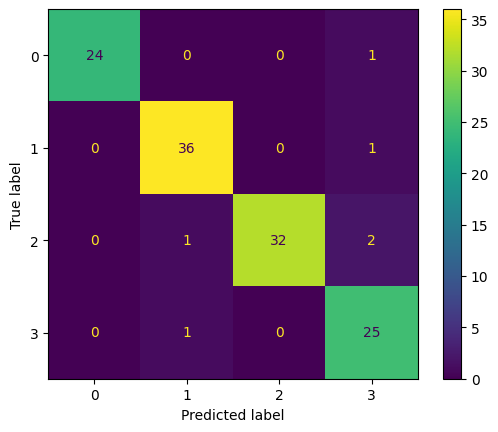

In [36]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [37]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [38]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [39]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
28,50,l2,newton-cg,0.842066,0.016290,0.868474,0.009156
37,75,l2,lbfgs,0.842066,0.016290,0.867429,0.011247
29,50,l2,lbfgs,0.842020,0.012307,0.869478,0.007617
68,175,l2,newton-cg,0.840082,0.015018,0.869430,0.009020
44,100,l2,newton-cg,0.840082,0.015018,0.869443,0.010418


In [40]:
logistic_grid.best_params_

{'classifier__C': 50,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [41]:
logistic_grid.best_score_

0.8420660892016536

In [42]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=50, class_weight='balanced',
                                    random_state=33, solver='newton-cg'))])


In [43]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.40558789 -1.33382373 -0.41350386  1.3417397 ]
Coeficientes: [('CH1', -3.921906058252513), ('CH2', -1.0902785500286594), ('CH3', 3.013154316830848), ('CH4', 0.29628965679983), ('CH5', -0.4896976467979441), ('CH6', 1.7359588898755915), ('CH7', 3.9672416538731166), ('CH8', -0.1611182424346487), ('AccX', 1.2664106033507239), ('AccY', 1.9750876310297871), ('AccZ', 1.1205831352954296), ('GyX', -2.398835403158392), ('GyY', 0.30925248312876263), ('GyZ', -0.035659076655196145), ('TimeStamp', -5.031237301841437), ('label', 0.6123440777671556)]
Accuracy de test: 0.8943089430894309


In [44]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.97      0.86      0.91        37
           2       1.00      0.83      0.91        35
           3       0.89      0.96      0.93        26

    accuracy                           0.89       123
   macro avg       0.90      0.90      0.89       123
weighted avg       0.91      0.89      0.90       123



In [46]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.8943089430894309


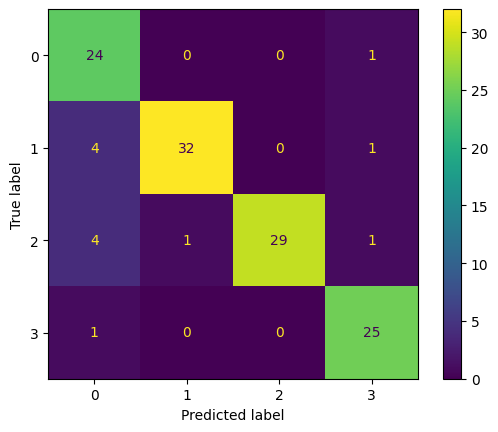

In [47]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [48]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [49]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [50]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
192,0,0.3,3,5,0.950193,0.012996,1.0,0.0
252,0,0.5,3,5,0.950193,0.012996,1.0,0.0
256,0,0.5,3,75,0.946317,0.014156,1.0,0.0
257,0,0.5,3,100,0.946317,0.014156,1.0,0.0
253,0,0.5,3,10,0.946317,0.014156,1.0,0.0


In [51]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 3,
 'classifier__max_leaf_nodes': 5}

In [52]:
hist_gradient_grid.best_score_

0.9501925561518584

In [53]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.3, max_depth=3,
                                                max_iter=1000, max_leaf_nodes=5,
                                                n_iter_no_change=5,
                                                random_state=33

In [54]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [55]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.95      1.00      0.97        37
           2       1.00      0.91      0.96        35
           3       0.86      0.96      0.91        26

    accuracy                           0.95       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.96      0.95      0.95       123



In [56]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.9512195121951219


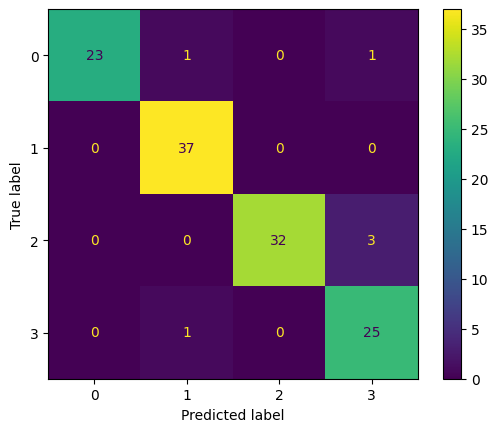

In [57]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [58]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [59]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [60]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
339,0.1,3,401,0.7,0.932154,0.008667
993,0.5,3,30,0.7,0.931757,0.008305
1017,0.5,3,156,0.7,0.930216,0.007673
1005,0.5,3,226,0.7,0.930018,0.011688
1322,0.7,3,30,0.5,0.928531,0.010788


In [61]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 401,
 'classifier__subsample': 0.7}

In [62]:
XGBoost_grid.best_score_

0.9321543927648578

In [63]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
             

In [64]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.95      1.00      0.97        37
           2       0.97      0.91      0.94        35
           3       0.89      0.92      0.91        26

    accuracy                           0.94       123
   macro avg       0.94      0.94      0.94       123
weighted avg       0.94      0.94      0.94       123



In [66]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.943089430894309


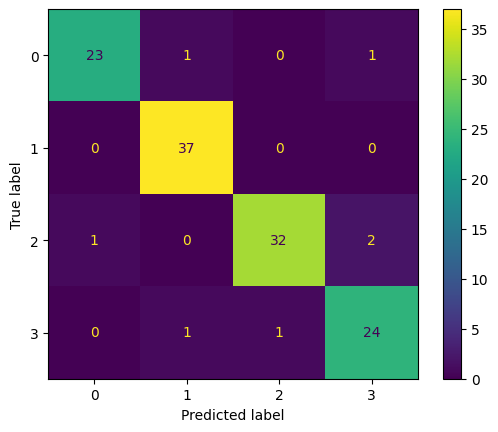

In [67]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [68]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [69]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 489, number of used features: 14
[LightGBM] [Info] Start training from score -1.364049
[LightGBM] [Info] Start training from score -1.430189
[LightGBM] [Info] Start training from score -1.421678
[LightGBM] [Info] Start training from score -1.332550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014849F40850>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [70]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
126,gbdt,True,0.3,100,221,3,1,0.952222,0.005796,1.0,0.0
153,gbdt,True,0.9,3,76,5,0.1,0.950391,0.008811,1.0,0.0
117,gbdt,True,0.5,100,478,3,0.3,0.950086,0.004754,1.0,0.0
198,gbdt,True,0.5,3,355,3,0.1,0.950086,0.004754,1.0,0.0
82,gbdt,True,0.7,25,401,3,0.7,0.948293,0.007350,1.0,0.0


In [71]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 100,
 'classifier__n_estimators': 221,
 'classifier__num_leaves': 3,
 'classifier__subsample': 1}

In [72]:
light_grid.best_score_

0.952222470681773

In [73]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.3,
                                max_depth=100, n_estimators=221, num_leaves=3,
                                random_state=33, subsample=1))])


In [74]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [75]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.95      1.00      0.97        37
           2       1.00      0.91      0.96        35
           3       0.93      0.96      0.94        26

    accuracy                           0.96       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.96      0.96      0.96       123



In [76]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.959349593495935


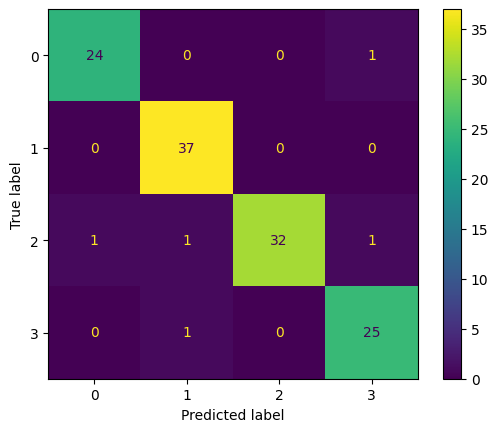

In [77]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [78]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [79]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [80]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
119,150,0.01,rbf,0.876561,0.018044
87,100,0.01,rbf,0.876416,0.026889
135,175,0.01,rbf,0.874425,0.016806
103,125,0.01,rbf,0.874226,0.021346
113,150,scale,rbf,0.872288,0.016050


In [81]:
svm_grid.best_params_

{'classifier__C': 150, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

In [82]:
svm_grid.best_score_

0.8765612696057961

In [83]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=150, gamma=0.01))])


In [84]:
modelo_final_svm = svm_grid.best_estimator_

In [85]:
y_test_pred = modelo_final_svm.predict(x_test)

In [86]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.92      0.95      0.93        37
           2       1.00      0.80      0.89        35
           3       0.86      0.92      0.89        26

    accuracy                           0.90       123
   macro avg       0.90      0.91      0.90       123
weighted avg       0.91      0.90      0.90       123



In [87]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.9024390243902439


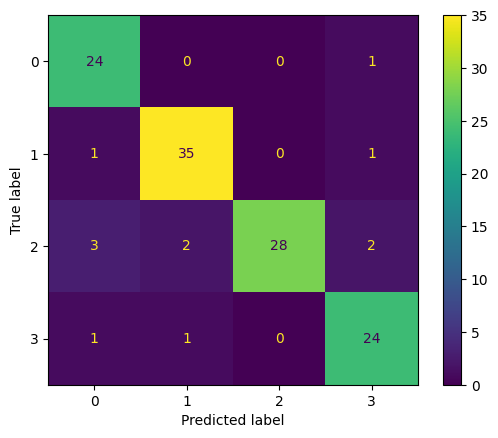

In [88]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [89]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [90]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [91]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
660,0.001,0.1,optimal,hinge,l1,0.841618,0.028425
580,0.001,0.01,optimal,hinge,l1,0.840104,0.024325
1181,0.00001,0.1,adaptive,hinge,l2,0.835656,0.012228
1183,0.00001,0.1,adaptive,hinge,None,0.833425,0.011586
708,0.001,0.1,adaptive,modified_huber,l1,0.831947,0.015099


In [92]:
sgd_grid.best_params_

{'classifier__alpha': 0.001,
 'classifier__eta0': 0.1,
 'classifier__learning_rate': 'optimal',
 'classifier__loss': 'hinge',
 'classifier__penalty': 'l1'}

In [93]:
sgd_grid.best_score_

0.8416179097262478

In [94]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.001, eta0=0.1, penalty='l1'))])


In [95]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       1.00      0.78      0.88        37
           2       0.97      0.86      0.91        35
           3       0.83      0.96      0.89        26

    accuracy                           0.88       123
   macro avg       0.88      0.89      0.88       123
weighted avg       0.90      0.88      0.88       123



In [97]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.8780487804878049


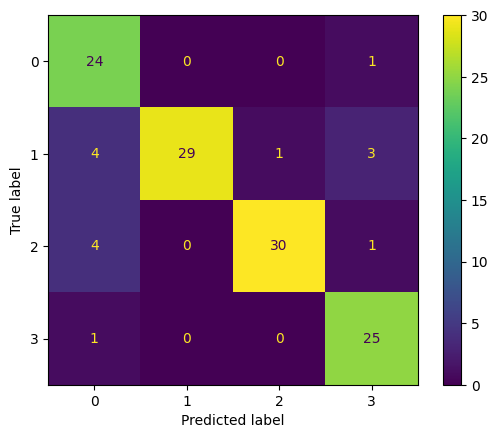

In [98]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

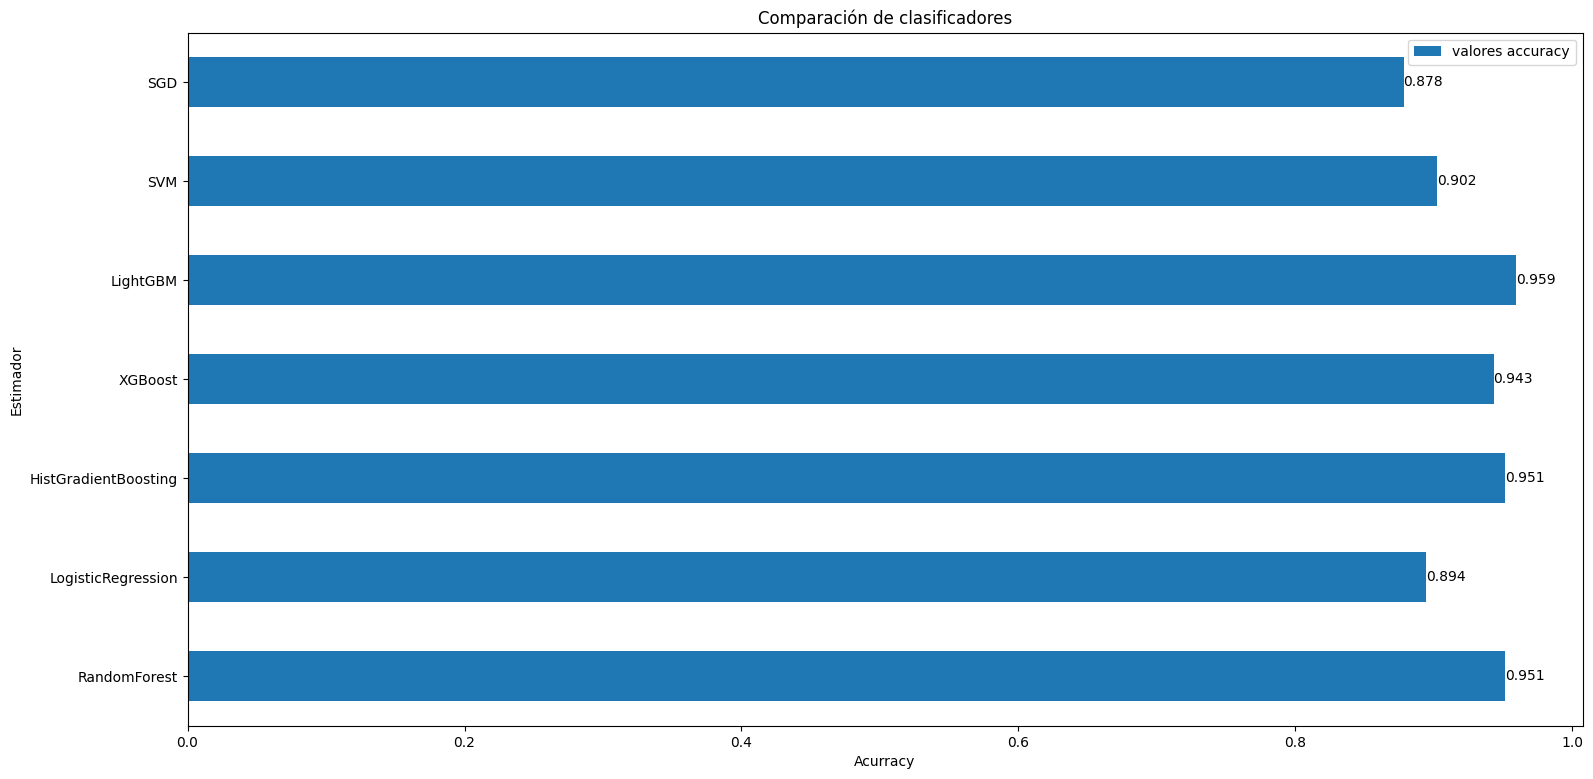

In [111]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [100]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [102]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.001,
        eta0 = 0.1,
        learning_rate = 'optimal',
        loss = 'hinge',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_SGD.pkl', 'wb'))

In [110]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 125
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_RF.pkl', 'wb'))

In [103]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 150,
        gamma = 0.01,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_SVM.pkl', 'wb'))

In [109]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 50,
        penalty = 'l2',
        solver = 'newton-cg',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_LR.pkl', 'wb'))

In [108]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.3,
        max_depth = 3,
        max_leaf_nodes = 5         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_HIST.pkl', 'wb'))

In [107]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.1,
        max_depth = 3,
        n_estimators = 401,
        subsample = 0.7        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_XGB.pkl', 'wb'))

In [106]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.3,
        max_depth = 100,
        n_estimators = 221,
        num_leaves = 3,
        subsample = 1      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PALMA/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 489, number of used features: 14
[LightGBM] [Info] Start training from score -1.364049
[LightGBM] [Info] Start training from score -1.430189
[LightGBM] [Info] Start training from score -1.421678
[LightGBM] [Info] Start training from score -1.332550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# 4 GESTOS PUÑO

In [112]:
path = "data_train_4G_puño.csv"

df = pd.read_csv(path)

In [113]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [114]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876,43:54.481843,0
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185,43:54.730036,0
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477,43:54.984387,0
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060,43:55.230151,0
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270,43:55.485744,0


In [115]:
print(df.shape)

(611, 16)


Obtenemos el número de gestos realizados, `label`

In [116]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 4



0. Reposo
1. Puño
2. Pronación
3. Supinación


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [117]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [118]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [119]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270


In [120]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [121]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,11622.179813,10915.520759,8056.418601,14681.380317,13294.666045,10308.071593,11895.391264,4749.499368,60.320075,159.498655,165.934021,0.057625,0.016791,0.014657
std,9766.747136,4332.694003,6971.343890,5117.598420,8185.233155,2465.838307,4551.750454,2759.076424,28.758843,53.696153,43.598712,0.131541,0.025816,0.017989
min,29.660622,2516.672068,139.751427,8029.783439,3023.975367,5501.020475,5911.057499,480.783204,2.468458,8.325124,2.190726,0.002094,0.001216,0.001064
25%,3570.540309,8502.575203,843.890546,9203.664944,4466.823053,8439.643824,7166.184554,1808.641035,43.460480,156.265574,142.519244,0.007044,0.004549,0.004751
50%,14323.057635,10041.657170,9206.761671,15836.832447,17138.591376,10542.189754,12339.873275,5318.322255,53.398402,176.767079,164.521356,0.013015,0.007275,0.008010
75%,17046.247736,12314.282846,12497.641539,18162.277806,21332.852723,12487.877642,17387.246494,6708.091157,70.918347,187.898638,186.952580,0.027047,0.016677,0.015948
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,11767.637920,128.159950,243.803526,252.074446,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [122]:
y_df.value_counts()

label
2    153
1    153
3    153
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [123]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [124]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [125]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [126]:
y_df.isnull().any()

False

In [127]:
y_df.isnull().sum()

0

In [128]:
y_df.isnull().sum() / len(y_df) * 100

0.0

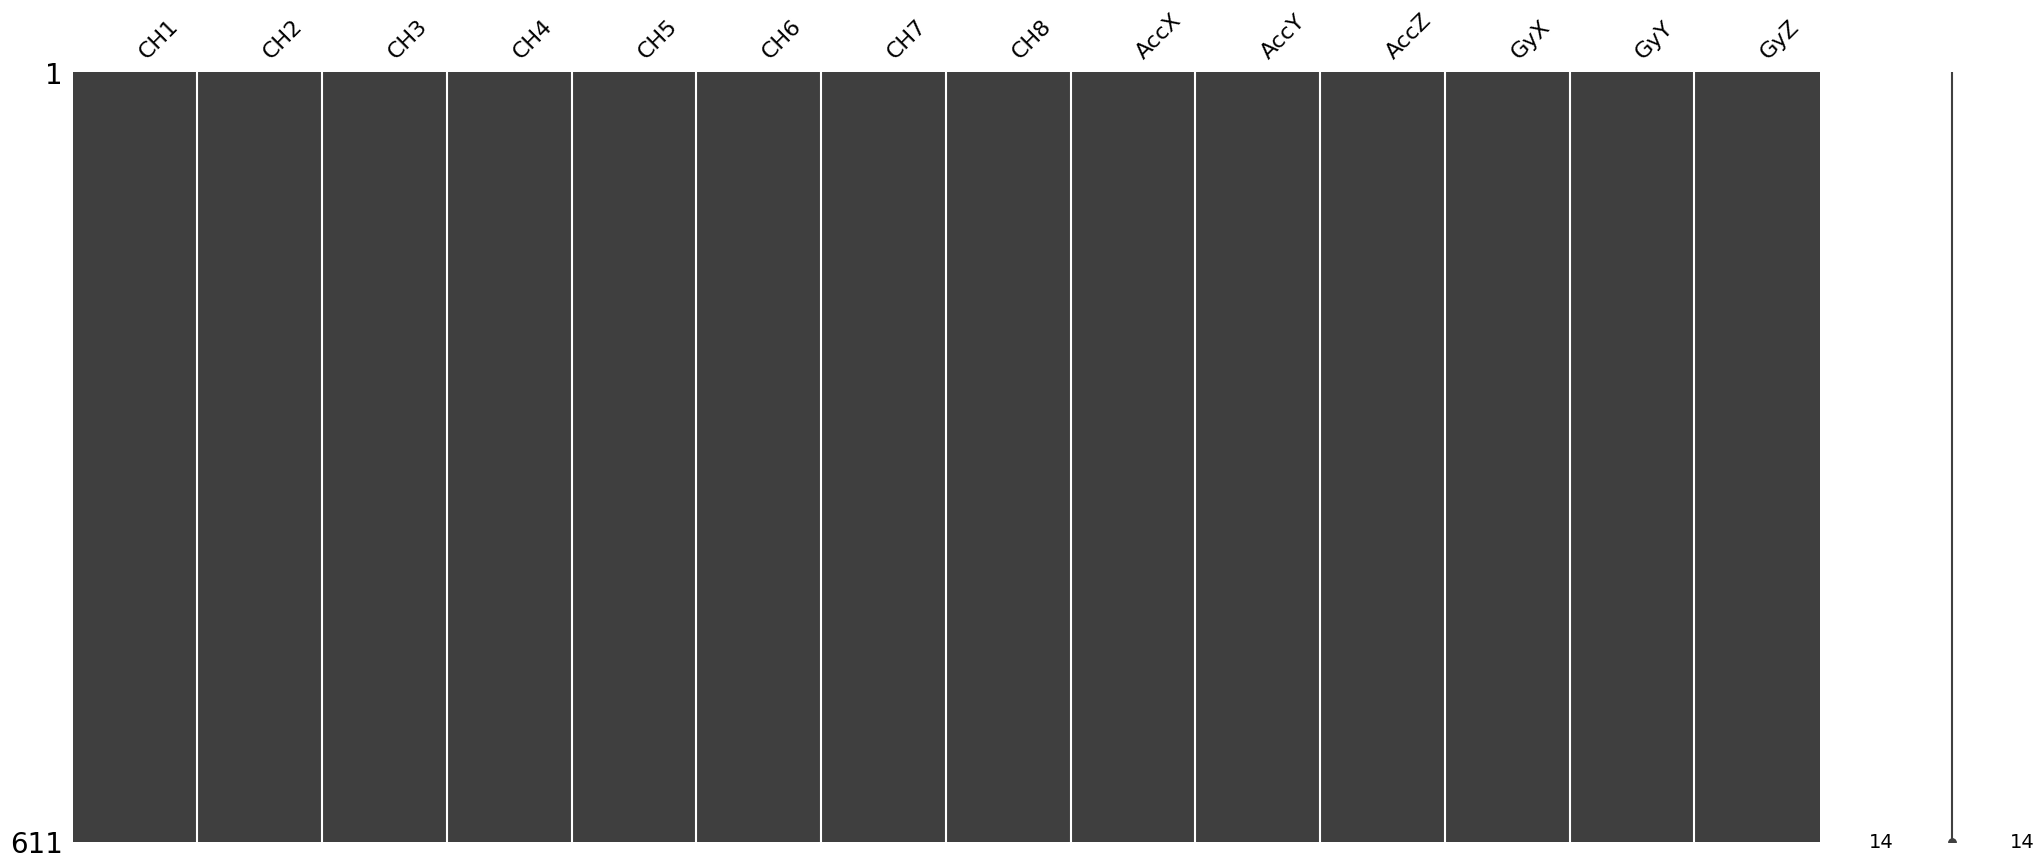

In [129]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

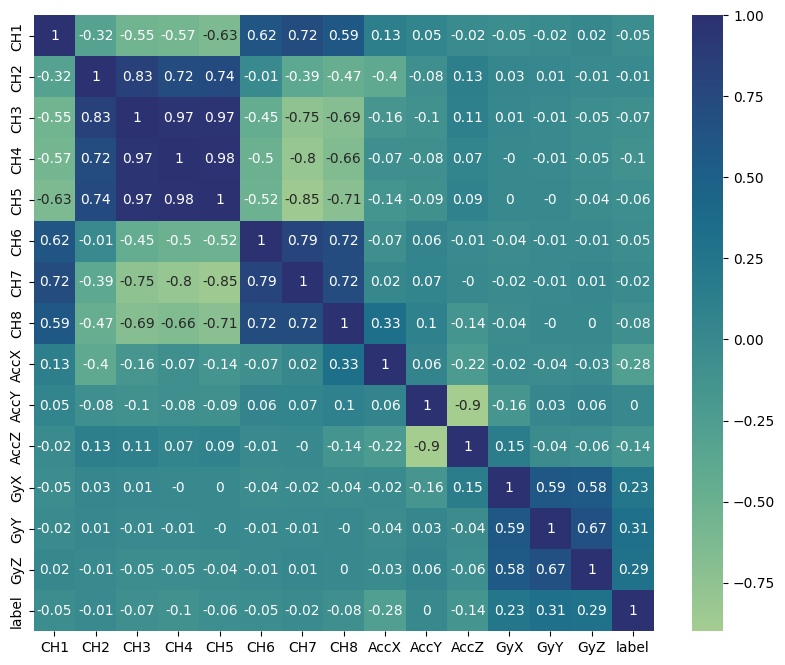

In [130]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [133]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [134]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [136]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [137]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [138]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [139]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
9,True,200,0.934384,0.015540
10,True,225,0.932339,0.013499
7,True,150,0.930294,0.012836
8,True,175,0.930294,0.012836
11,True,250,0.928249,0.010670


In [140]:
random_forest_grid.best_score_

0.9343835996869397

In [141]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 200}

In [142]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=33))])


In [143]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [144]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.96      1.00      0.98        27
           2       1.00      0.88      0.94        34
           3       0.90      0.96      0.93        28

    accuracy                           0.96       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.96      0.96      0.96       123



In [145]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.959349593495935


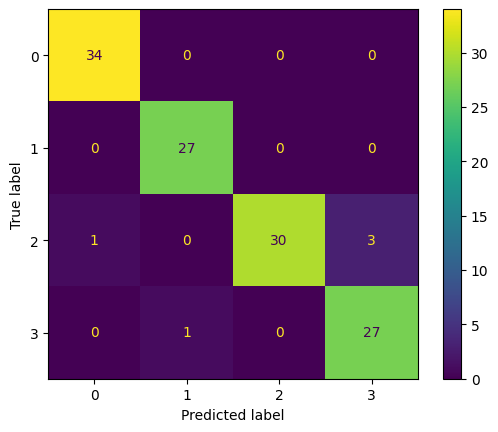

In [146]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [147]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [148]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [149]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
28,50,l2,newton-cg,0.798102,0.027300,0.832492,0.011726
20,25,l2,newton-cg,0.796065,0.024933,0.833547,0.010235
0,1,None,newton-cg,0.795767,0.041331,0.832442,0.011689
16,25,None,newton-cg,0.795767,0.041331,0.832442,0.011689
72,200,None,newton-cg,0.795767,0.041331,0.832442,0.011689


In [150]:
logistic_grid.best_params_

{'classifier__C': 50,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [151]:
logistic_grid.best_score_

0.7981020503886357

In [152]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=50, class_weight='balanced',
                                    random_state=33, solver='newton-cg'))])


In [153]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [-0.55986985  2.06495675 -1.93831498  0.43322809]
Coeficientes: [('CH1', -3.7509811095665877), ('CH2', -0.5895178165315291), ('CH3', -0.4320790422551637), ('CH4', 1.191527841544898), ('CH5', 1.0862404584305962), ('CH6', 2.0121778468333593), ('CH7', 3.296202867440268), ('CH8', -0.534110779334227), ('AccX', 1.6225234228900187), ('AccY', 1.5884975405519246), ('AccZ', 1.848300978132462), ('GyX', -2.813962289770964), ('GyY', -0.8476543116574525), ('GyZ', 1.12359717839859), ('TimeStamp', 2.3613969191735364), ('label', 1.2660833903841582)]
Accuracy de test: 0.8130081300813008


In [154]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [155]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.68      0.63      0.65        27
           2       0.94      0.91      0.93        34
           3       0.86      0.86      0.86        28

    accuracy                           0.81       123
   macro avg       0.81      0.81      0.81       123
weighted avg       0.81      0.81      0.81       123



In [156]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.8130081300813008


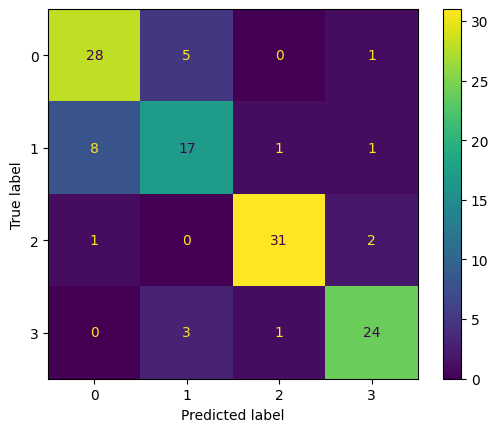

In [157]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [158]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [159]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [160]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
797,1,0.9,3,100,0.953009,0.012631,1.0,0.0
796,1,0.9,3,75,0.953009,0.012631,1.0,0.0
795,1,0.9,3,50,0.953009,0.012631,1.0,0.0
794,1,0.9,3,25,0.953009,0.012631,1.0,0.0
793,1,0.9,3,10,0.953009,0.012631,1.0,0.0


In [161]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 7,
 'classifier__max_leaf_nodes': 10}

In [162]:
hist_gradient_grid.best_score_

0.9530091351737693

In [163]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.5, max_depth=7,
                                                max_iter=1000,
                                                max_leaf_nodes=10,
                                                n_iter_no_change=5,
              

In [164]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [165]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        27
           2       0.97      0.94      0.96        34
           3       0.97      1.00      0.98        28

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



In [166]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.975609756097561


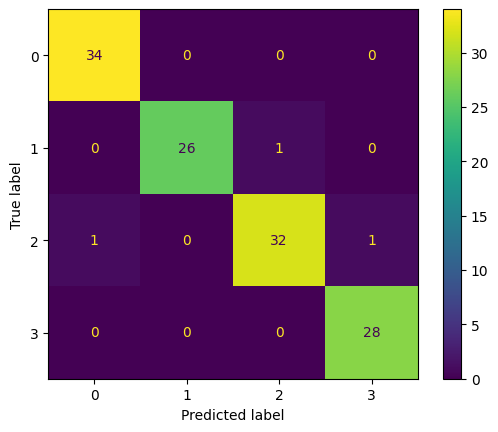

In [167]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [168]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [169]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [170]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
728,0.3,7,401,0.5,0.947008,0.006245
734,0.3,7,226,0.5,0.947008,0.006245
746,0.3,7,156,0.5,0.945024,0.009049
1268,0.5,75,401,0.5,0.942893,0.003041
1178,0.5,15,401,0.5,0.942893,0.003041


In [171]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 401,
 'classifier__subsample': 0.5}

In [172]:
XGBoost_grid.best_score_

0.947008360880312

In [173]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
             

In [174]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.84      1.00      0.92        27
           2       1.00      0.91      0.95        34
           3       0.93      0.93      0.93        28

    accuracy                           0.93       123
   macro avg       0.94      0.94      0.93       123
weighted avg       0.94      0.93      0.94       123



In [176]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9349593495934959


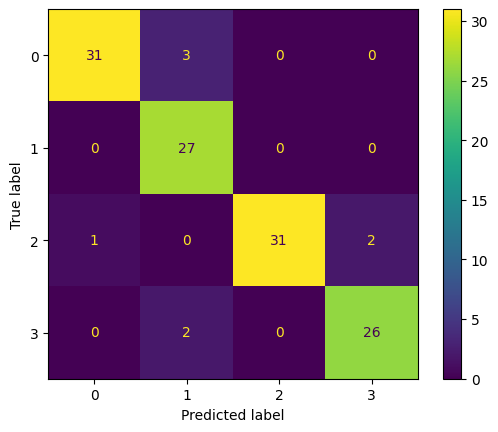

In [177]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [178]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [179]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 14
[LightGBM] [Info] Start training from score -1.419631
[LightGBM] [Info] Start training from score -1.354033
[LightGBM] [Info] Start training from score -1.411192
[LightGBM] [Info] Start training from score -1.362002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014855C0E8D0>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [180]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
250,gbdt,True,0.9,3,307,7,1,0.956977,0.004667,1.0,0.0
497,gbdt,True,0.5,10,293,100,0.9,0.955146,0.007115,1.0,0.0
123,gbdt,True,0.5,10,442,25,0.7,0.953162,0.007288,1.0,0.0
42,gbdt,True,0.5,10,457,100,0.9,0.953162,0.007288,1.0,0.0
244,gbdt,True,0.5,10,117,100,0.1,0.953162,0.007288,1.0,0.0


In [181]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.9,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 307,
 'classifier__num_leaves': 7,
 'classifier__subsample': 1}

In [182]:
light_grid.best_score_

0.9569773891420232

In [183]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.9,
                                max_depth=3, n_estimators=307, num_leaves=7,
                                random_state=33, subsample=1))])


In [184]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [185]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      1.00      1.00        27
           2       0.94      0.94      0.94        34
           3       0.96      0.93      0.95        28

    accuracy                           0.97       123
   macro avg       0.97      0.97      0.97       123
weighted avg       0.97      0.97      0.97       123



In [186]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.967479674796748


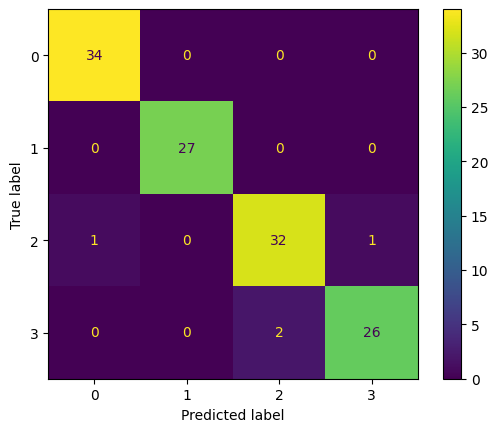

In [187]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [188]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [189]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [190]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
137,175,0.1,rbf,0.876124,0.025445
121,150,0.1,rbf,0.874140,0.025933
89,100,0.1,rbf,0.873987,0.029541
105,125,0.1,rbf,0.872003,0.026779
153,200,0.1,rbf,0.872003,0.023305


In [191]:
svm_grid.best_params_

{'classifier__C': 175, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

In [192]:
svm_grid.best_score_

0.8761238422823788

In [193]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=175, gamma=0.1))])


In [194]:
modelo_final_svm = svm_grid.best_estimator_

In [195]:
y_test_pred = modelo_final_svm.predict(x_test)

In [196]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.92      0.89      0.91        27
           2       0.97      0.94      0.96        34
           3       0.93      0.93      0.93        28

    accuracy                           0.93       123
   macro avg       0.93      0.93      0.93       123
weighted avg       0.94      0.93      0.93       123



In [197]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.9349593495934959


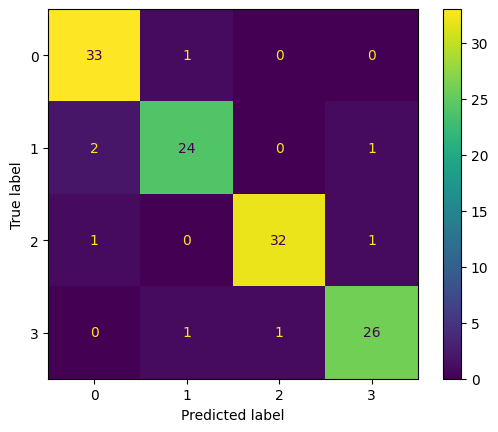

In [198]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [199]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [200]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [201]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
157,0.1,0.01,adaptive,perceptron,l2,0.795357,0.023745
556,0.001,0.001,adaptive,perceptron,l1,0.794851,0.027811
159,0.1,0.01,adaptive,perceptron,None,0.794851,0.022182
493,0.001,0.001,constant,squared_hinge,l2,0.793149,0.025380
1032,0.00001,0.001,adaptive,squared_hinge,l1,0.793149,0.020885


In [202]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.01,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'perceptron',
 'classifier__penalty': 'l2'}

In [203]:
sgd_grid.best_score_

0.7953574034366717

In [204]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.01, learning_rate='adaptive',
                               loss='perceptron'))])


In [205]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [206]:
print(classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        34
           1       0.54      0.70      0.61        27
           2       0.94      0.94      0.94        34
           3       0.96      0.93      0.95        28

    accuracy                           0.78       123
   macro avg       0.79      0.78      0.78       123
weighted avg       0.79      0.78      0.78       123



In [207]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.7804878048780488


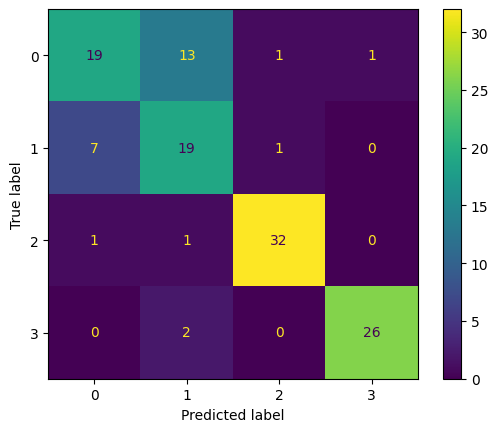

In [208]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

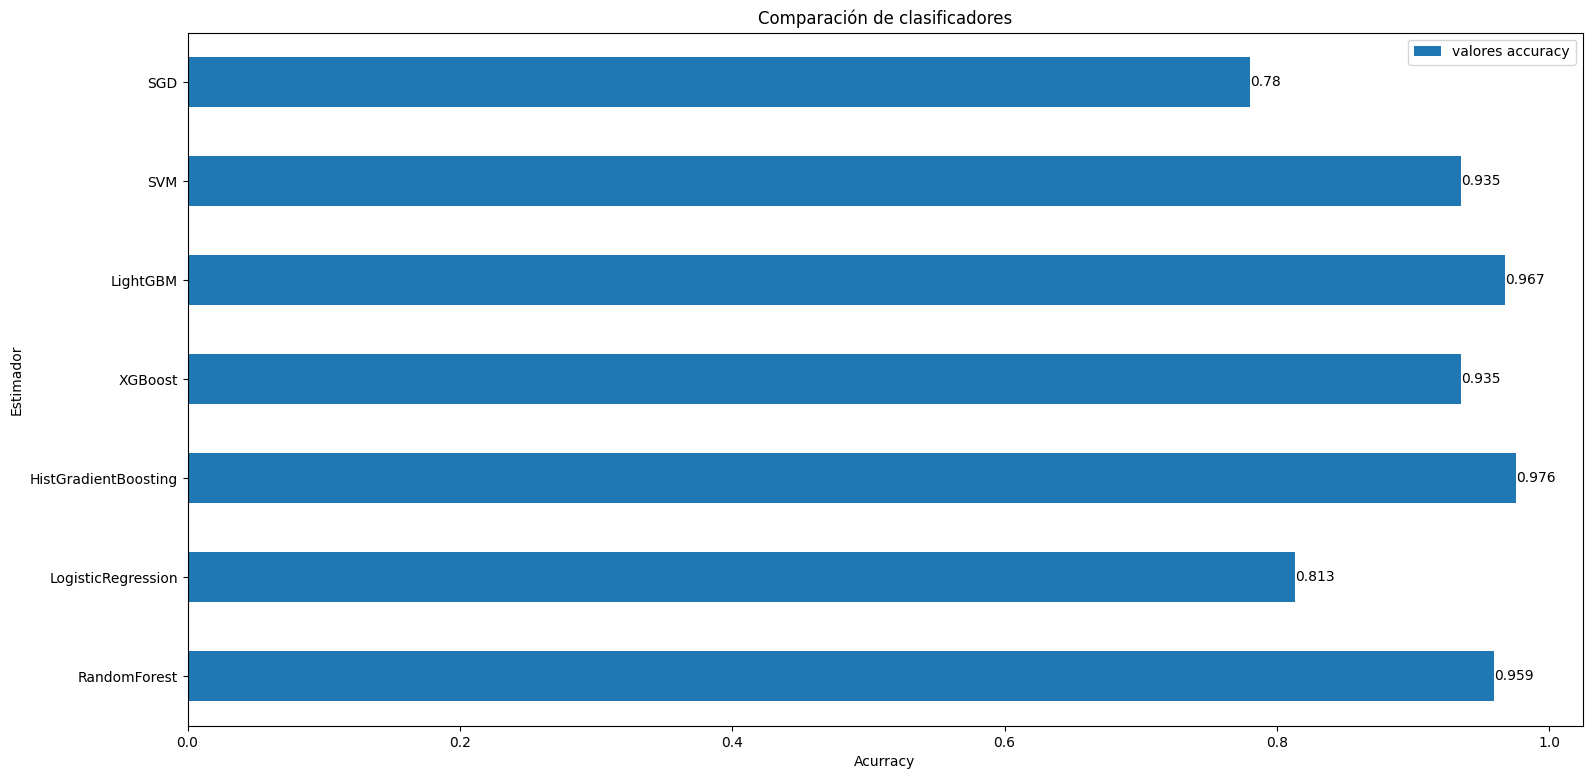

In [209]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`.

In [210]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [211]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.01,
        learning_rate = 'adaptive',
        loss = 'perceptron',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_sgd.pkl', 'wb'))

In [217]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 200
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_RF.pkl', 'wb'))

In [212]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 175,
        gamma = 0.1,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_SVM.pkl', 'wb'))

In [216]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 50,
        penalty = 'l2',
        solver = 'newton-cg',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_LR.pkl', 'wb'))

In [215]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.5,
        max_depth = 7,
        max_leaf_nodes = 10         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_HIST.pkl', 'wb'))

In [214]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.3,
        max_depth = 7,
        n_estimators = 401,
        subsample = 0.5        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_XGB.pkl', 'wb'))

In [213]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.9,
        max_depth = 3,
        n_estimators = 307,
        num_leaves = 7,
        subsample = 1      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS 2 S/4 GESTOS PUÑO/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 14
[LightGBM] [Info] Start training from score -1.419631
[LightGBM] [Info] Start training from score -1.354033
[LightGBM] [Info] Start training from score -1.411192
[LightGBM] [Info] Start training from score -1.362002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 